# Q1
- Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data
- Identify the number of clusters formed and draw inferences.

- Data Description:
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States


- Hierarchical

In [1]:
import warnings
warnings.filterwarnings("ignore")
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [2]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
crime = pd.read_csv("D:\Data Science Assignments\Clustering\crime_data.csv")
crime

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0   Alabama         13.2    236      58        21.2
1   Alaska          10.0    263      48        44.5
2   Arizona         8.1     294      80        31.0
3   Arkansas        8.8     190      50        19.5
4   California      9.0     276      91        40.6
5   Colorado        7.9     204      78        38.7
6   Connecticut     3.3     110      77        11.1
7   Delaware        5.9     238      72        15.8
8   Florida         15.4    335      80        31.9
9   Georgia         17.4    211      60        25.8
10  Hawaii          5.3     46       83        20.2
11  Idaho           2.6     120      54        14.2
12  Illinois        10.4    249      83        24.0
13  Indiana         7.2     113      65        21.0
14  Iowa            2.2     56       57        11.3
15  Kansas          6.0     115      66        18.0
16  Kentucky        9.7     109      52        16.3
17  Louisiana       15.4    249      66        22.2
18  Maine           2.1     83       51        7.8 
19  Maryland        11.3    300      67        27.8
20  Massachusetts   4.4     149      85        16.3
21  Michigan        12.1    255      74        35.1
22  Minnesota       2.7     72       66        14.9
23  Mississippi     16.1    259      44        17.1
24  Missouri        9.0     178      70        28.2
25  Montana         6.0     109      53        16.4
26  Nebraska        4.3     102      62        16.5
27  Nevada          12.2    252      81        46.0
28  New Hampshire   2.1     57       56        9.5 
29  New Jersey      7.4     159      89        18.8
30  New Mexico      11.4    285      70        32.1
31  New York        11.1    254      86        26.1
32  North Carolina  13.0    337      45        16.1
33  North Dakota    0.8     45       44        7.3 
34  Ohio            7.3     120      75        21.4
35  Oklahoma        6.6     151      68        20.0
36  Oregon          4.9     159      67        29.3
37  Pennsylvania    6.3     106      72        14.9
38  Rhode Island    3.4     174      87        8.3 
39  South Carolina  14.4    279      48        22.5
40  South Dakota    3.8     86       45        12.8
41  Tennessee       13.2    188      59        26.9
42  Texas           12.7    201      80        25.5
43  Utah            3.2     120      80        22.9
44  Vermont         2.2     48       32        11.2
45  Virginia        8.5     156      63        20.7
46  Washington      4.0     145      73        26.2
47  West Virginia   5.7     81       39        9.3 
48  Wisconsin       2.6     53       66        10.8
49  Wyoming         6.8     161      60        15.6

In [4]:
#Renaming the Unnamed: 0 Column into States
crime.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
crime.head(10)

States  Murder  Assault  UrbanPop  Rape
0  Alabama      13.2    236      58        21.2
1  Alaska       10.0    263      48        44.5
2  Arizona      8.1     294      80        31.0
3  Arkansas     8.8     190      50        19.5
4  California   9.0     276      91        40.6
5  Colorado     7.9     204      78        38.7
6  Connecticut  3.3     110      77        11.1
7  Delaware     5.9     238      72        15.8
8  Florida      15.4    335      80        31.9
9  Georgia      17.4    211      60        25.8

In [5]:
crime.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000  50.000000   50.000000  50.000000
mean   7.78800   170.760000  65.540000  21.232000
std    4.35551   83.337661   14.474763  9.366385 
min    0.80000   45.000000   32.000000  7.300000 
25%    4.07500   109.000000  54.500000  15.075000
50%    7.25000   159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [6]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
null_count_col = crime.isnull().sum().value_counts(ascending=False)

In [8]:
null_percent_col = (crime.isnull().sum() * 100 / len(crime)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    5
dtype: int64 

Null Percentage for Columns:

 0.0    5
dtype: int64


In [9]:
null_count_row = crime.isnull().sum(axis=1).value_counts(ascending=False)


null_percent_row = (crime.isnull().sum(axis=1) * 100 / len(crime)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    50
dtype: int64 

Null Percentage for Rows:

 0.0    50
dtype: int64


In [10]:
crime.duplicated().sum()

0

In [11]:
crime[crime.duplicated()]

Empty DataFrame
Columns: [States, Murder, Assault, UrbanPop, Rape]
Index: []

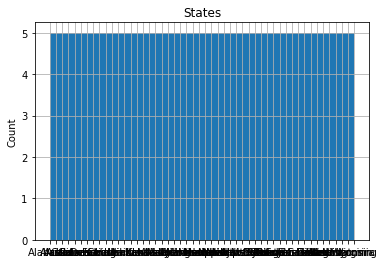

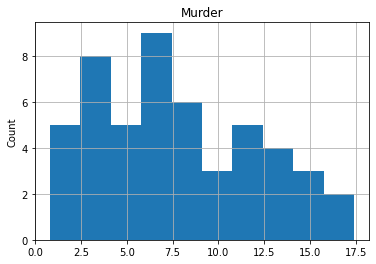

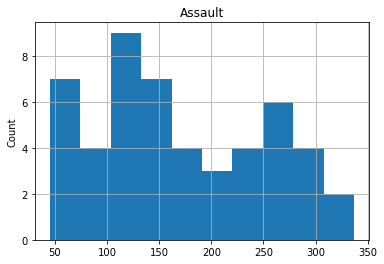

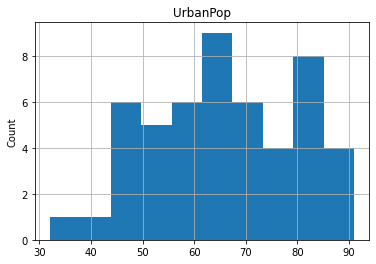

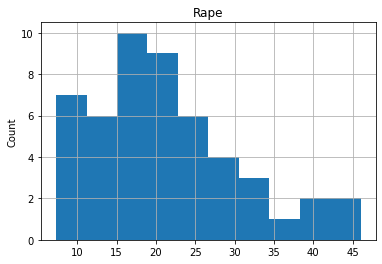

In [12]:
for feature in crime.columns:
    crime=crime.copy()
    crime[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [13]:
crime.columns

Index(['States', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

<AxesSubplot:>

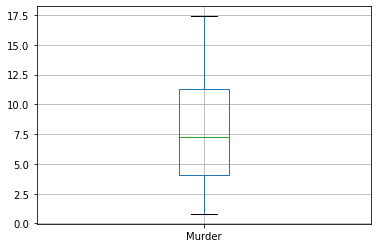

In [14]:
crime.boxplot(column=['Murder'],grid=True)

<AxesSubplot:>

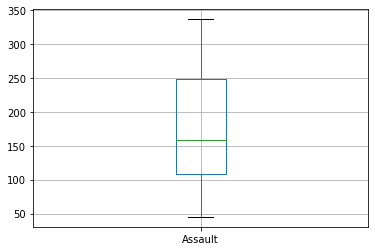

In [15]:
crime.boxplot(column=['Assault'],grid=True)

<AxesSubplot:>

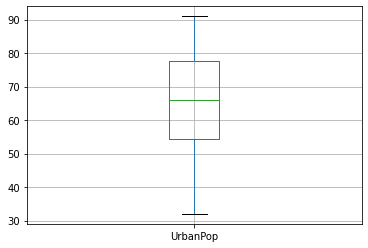

In [16]:
crime.boxplot(column=['UrbanPop'],grid=True)

<AxesSubplot:>

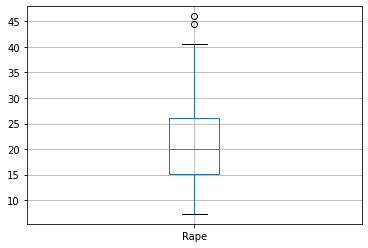

In [17]:
crime.boxplot(column=['Rape'],grid=True)

In [18]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

<AxesSubplot:>

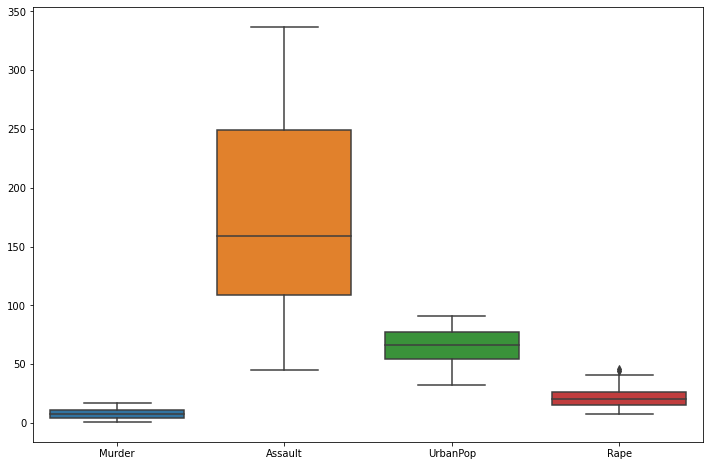

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=crime)

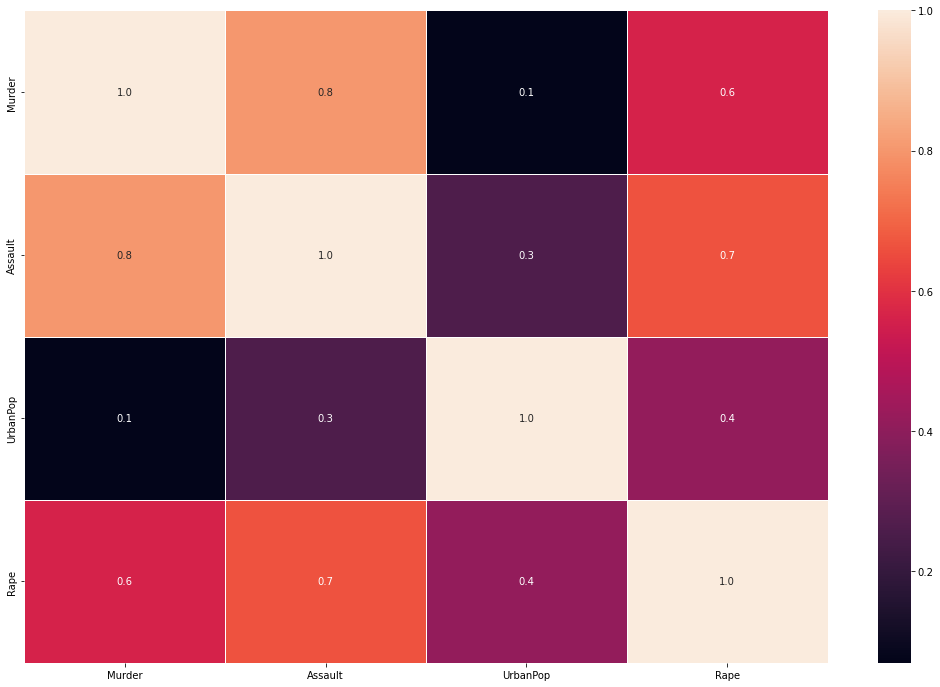

In [20]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(crime.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

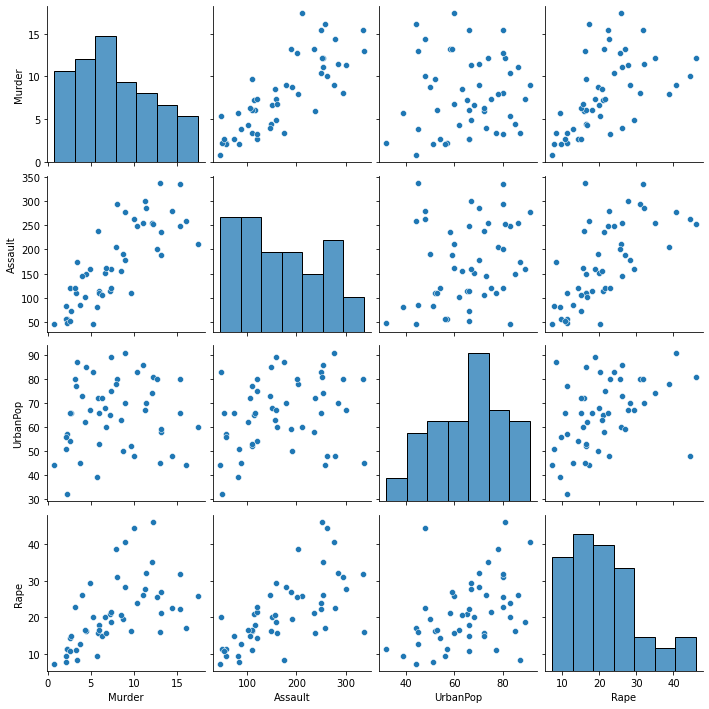

In [21]:
sns.pairplot(crime)

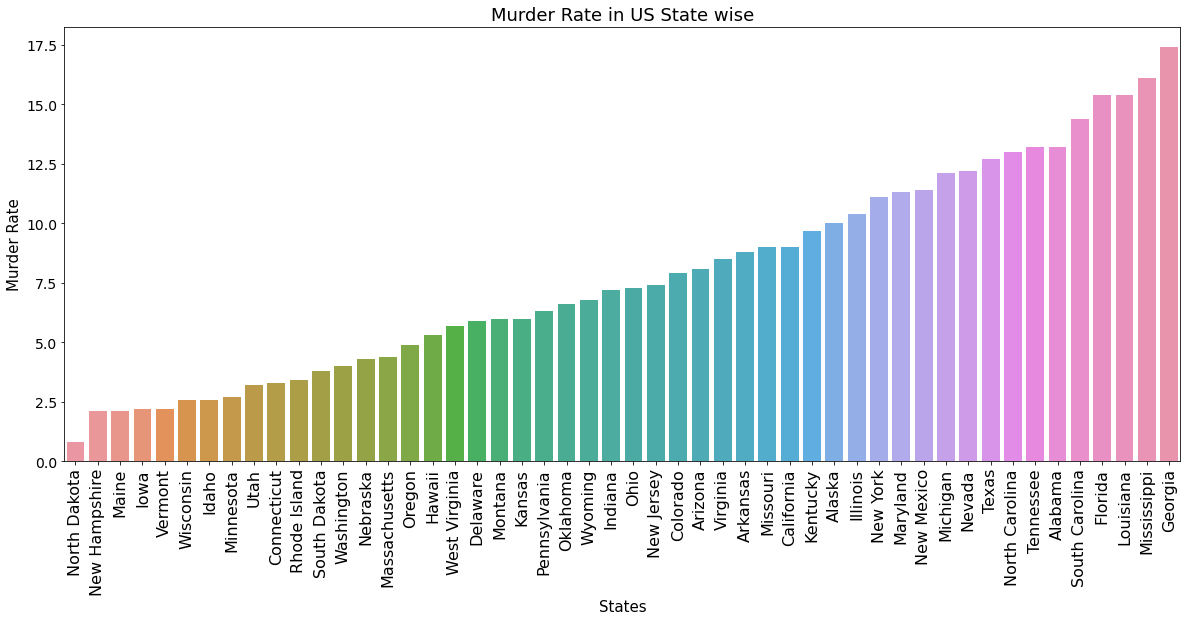

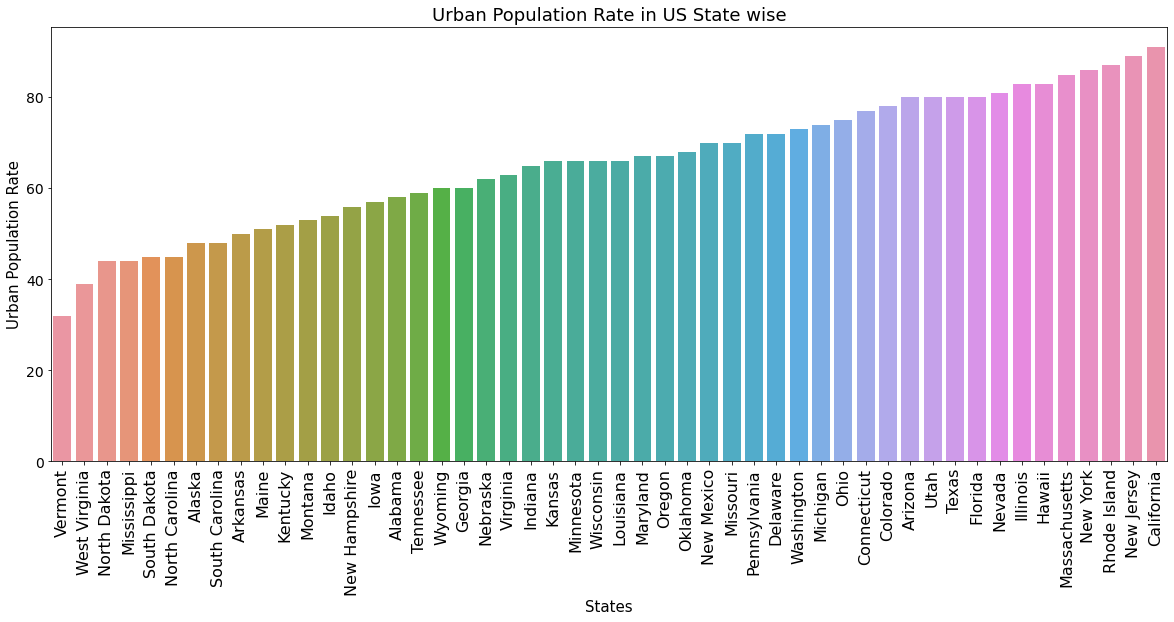

In [22]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Murder", 
            data=crime, 
            order=crime.sort_values('Murder').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="UrbanPop", 
            data=crime, 
            order=crime.sort_values('UrbanPop').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

In [23]:
print('Top 10 States with Highest Murder Rate')
crime.sort_values('Murder',ascending=False).head(10)

Top 10 States with Highest Murder Rate


States  Murder  Assault  UrbanPop  Rape
9   Georgia         17.4    211      60        25.8
23  Mississippi     16.1    259      44        17.1
8   Florida         15.4    335      80        31.9
17  Louisiana       15.4    249      66        22.2
39  South Carolina  14.4    279      48        22.5
0   Alabama         13.2    236      58        21.2
41  Tennessee       13.2    188      59        26.9
32  North Carolina  13.0    337      45        16.1
42  Texas           12.7    201      80        25.5
27  Nevada          12.2    252      81        46.0

In [24]:
print('Top 10 States with Lowest Murder Rate')
crime.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


States  Murder  Assault  UrbanPop  Rape
33  North Dakota   0.8     45       44        7.3 
28  New Hampshire  2.1     57       56        9.5 
18  Maine          2.1     83       51        7.8 
14  Iowa           2.2     56       57        11.3
44  Vermont        2.2     48       32        11.2
48  Wisconsin      2.6     53       66        10.8
11  Idaho          2.6     120      54        14.2
22  Minnesota      2.7     72       66        14.9
43  Utah           3.2     120      80        22.9
6   Connecticut    3.3     110      77        11.1

In [25]:
murder = crime.sort_values('Murder', ascending = False, ignore_index=True)
murder.head()

States  Murder  Assault  UrbanPop  Rape
0  Georgia         17.4    211      60        25.8
1  Mississippi     16.1    259      44        17.1
2  Florida         15.4    335      80        31.9
3  Louisiana       15.4    249      66        22.2
4  South Carolina  14.4    279      48        22.5

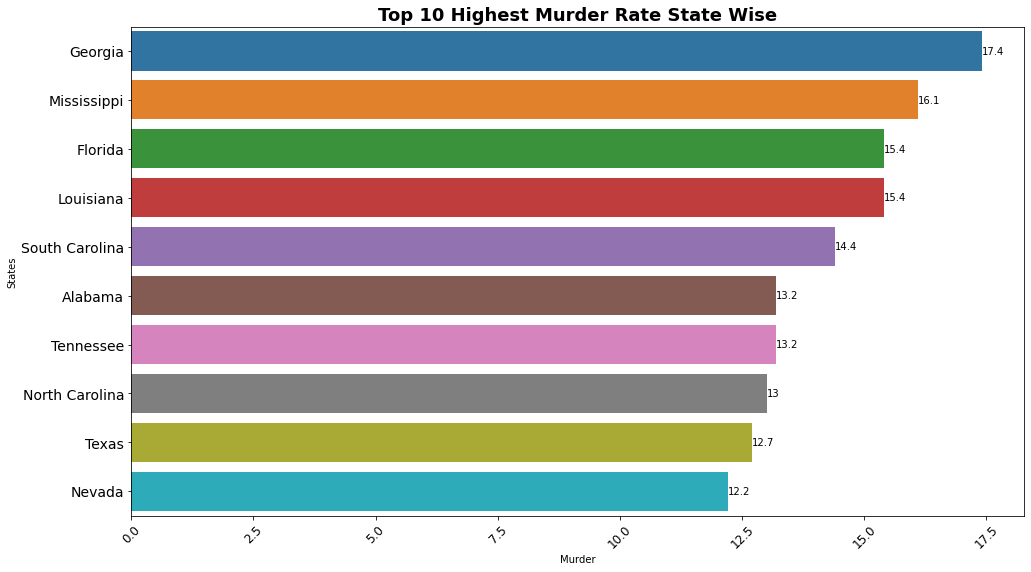

In [26]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

In [27]:
murder = crime.sort_values('Murder', ascending = True,ignore_index=True)
murder.head()

States  Murder  Assault  UrbanPop  Rape
0  North Dakota   0.8     45       44        7.3 
1  New Hampshire  2.1     57       56        9.5 
2  Maine          2.1     83       51        7.8 
3  Iowa           2.2     56       57        11.3
4  Vermont        2.2     48       32        11.2

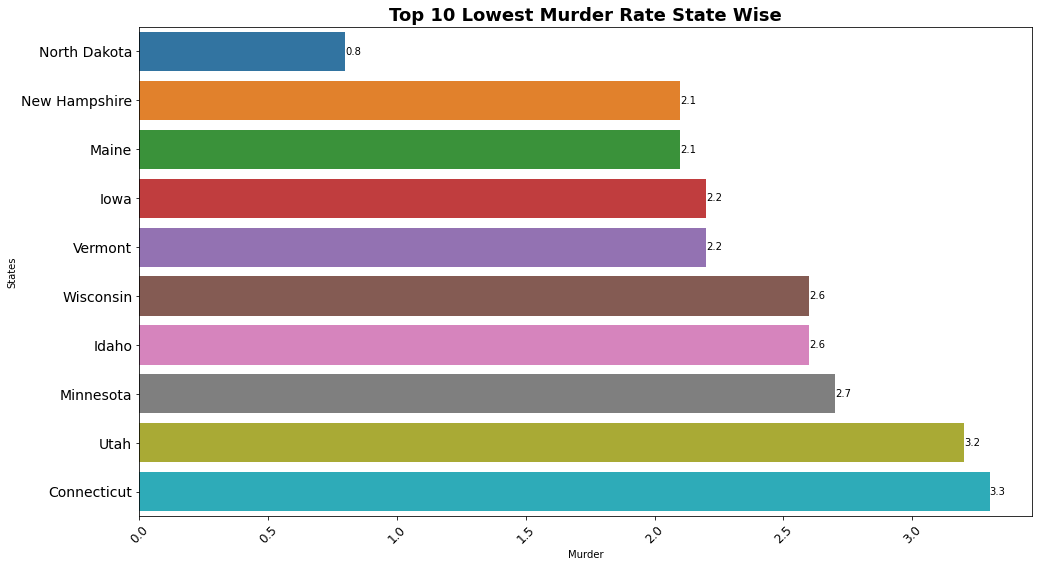

In [28]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:10], y = murder.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

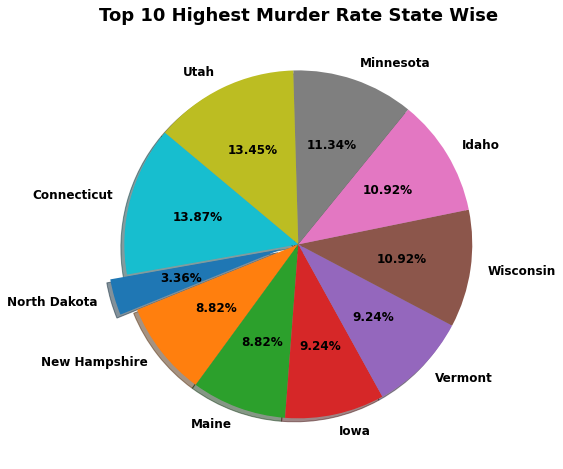

In [29]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Murder Rate State Wise", fontsize = 18, fontweight = 'bold')
plt.show()

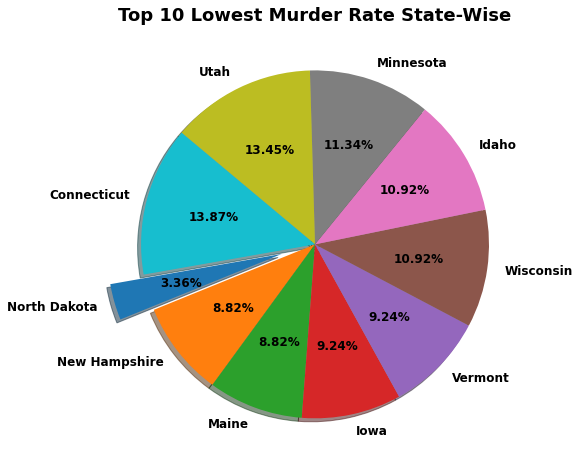

In [30]:
plt.figure(figsize = (8,8))
plt.pie(murder.Murder[:10],
       labels=murder.States[:10],
       explode = [0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Murder Rate State-Wise", fontsize = 18, fontweight = 'bold')
plt.show()

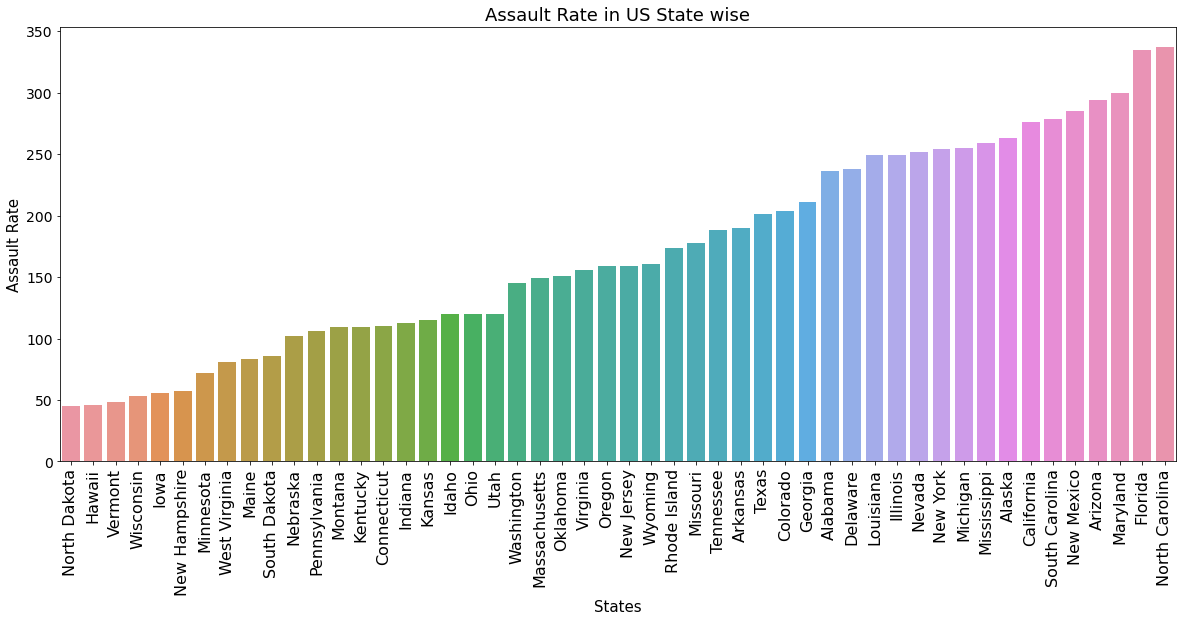

In [31]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Assault", 
            data=crime, 
            order=crime.sort_values('Assault').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Assault Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Assault Rate in US State wise", size=18)
plt.show()

In [32]:
print('Top 10 States with Highest Assault Rate')
crime.sort_values('Assault',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Assault Rate


States  Murder  Assault  UrbanPop  Rape
0  North Carolina  13.0    337      45        16.1
1  Florida         15.4    335      80        31.9
2  Maryland        11.3    300      67        27.8
3  Arizona         8.1     294      80        31.0
4  New Mexico      11.4    285      70        32.1
5  South Carolina  14.4    279      48        22.5
6  California      9.0     276      91        40.6
7  Alaska          10.0    263      48        44.5
8  Mississippi     16.1    259      44        17.1
9  Michigan        12.1    255      74        35.1

In [33]:
print('Top 10 States with Lowest Assault Rate')
crime.sort_values('Assault',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Assault Rate


States  Murder  Assault  UrbanPop  Rape
0  North Dakota   0.8     45       44        7.3 
1  Hawaii         5.3     46       83        20.2
2  Vermont        2.2     48       32        11.2
3  Wisconsin      2.6     53       66        10.8
4  Iowa           2.2     56       57        11.3
5  New Hampshire  2.1     57       56        9.5 
6  Minnesota      2.7     72       66        14.9
7  West Virginia  5.7     81       39        9.3 
8  Maine          2.1     83       51        7.8 
9  South Dakota   3.8     86       45        12.8

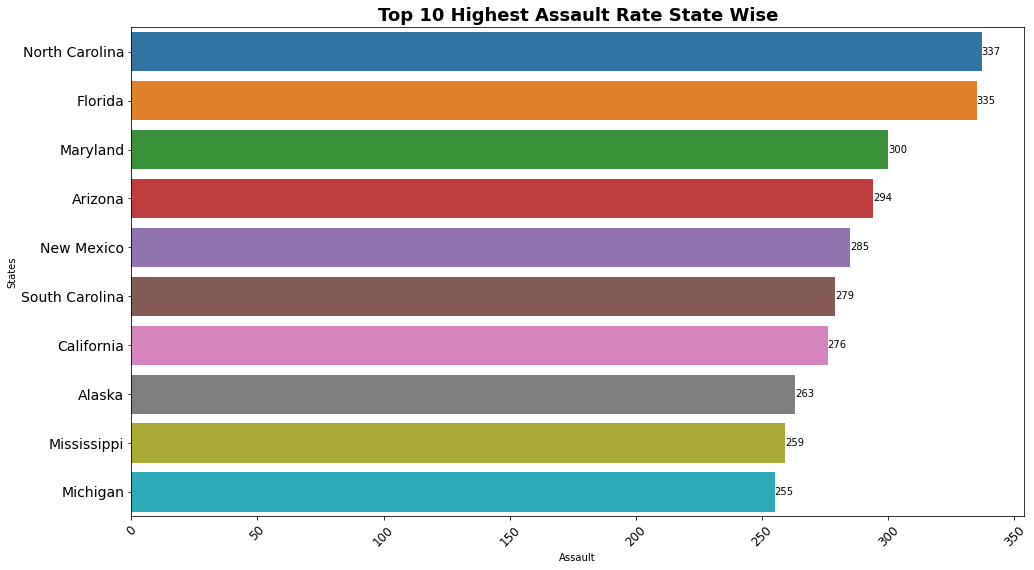

In [34]:
Assault = crime.sort_values('Assault', ascending = False)
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Assault.Assault[:10], y = Assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

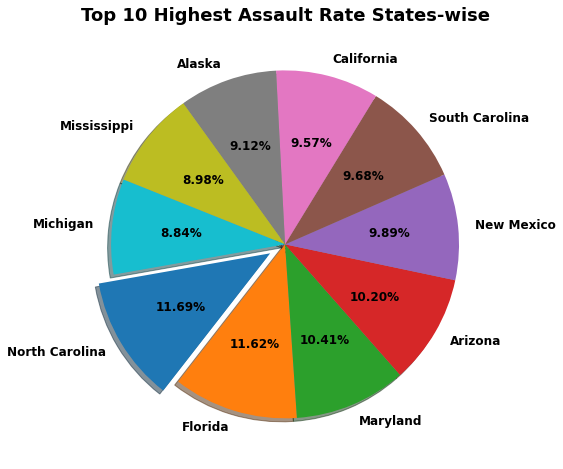

In [35]:
plt.figure(figsize = (8,8))
plt.pie(Assault.Assault[:10],
       labels=Assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

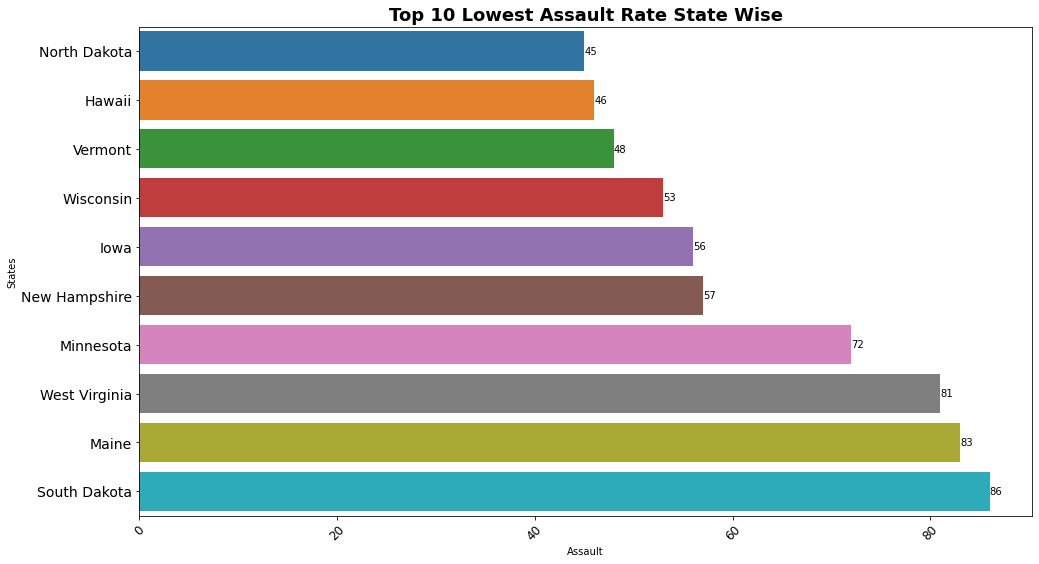

In [36]:
assault = crime.sort_values('Assault', ascending = True)
plt.figure(figsize = (16,9))
ax = sns.barplot(x = assault.Assault[:10], y = assault.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Assault Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

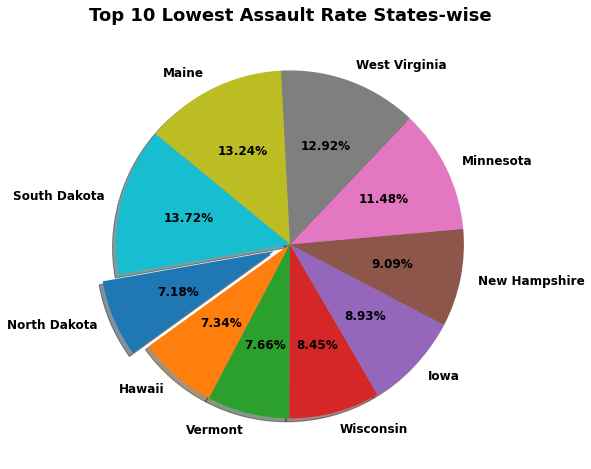

In [37]:
plt.figure(figsize = (8,8))
plt.pie(assault.Assault[:10],
       labels=assault.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

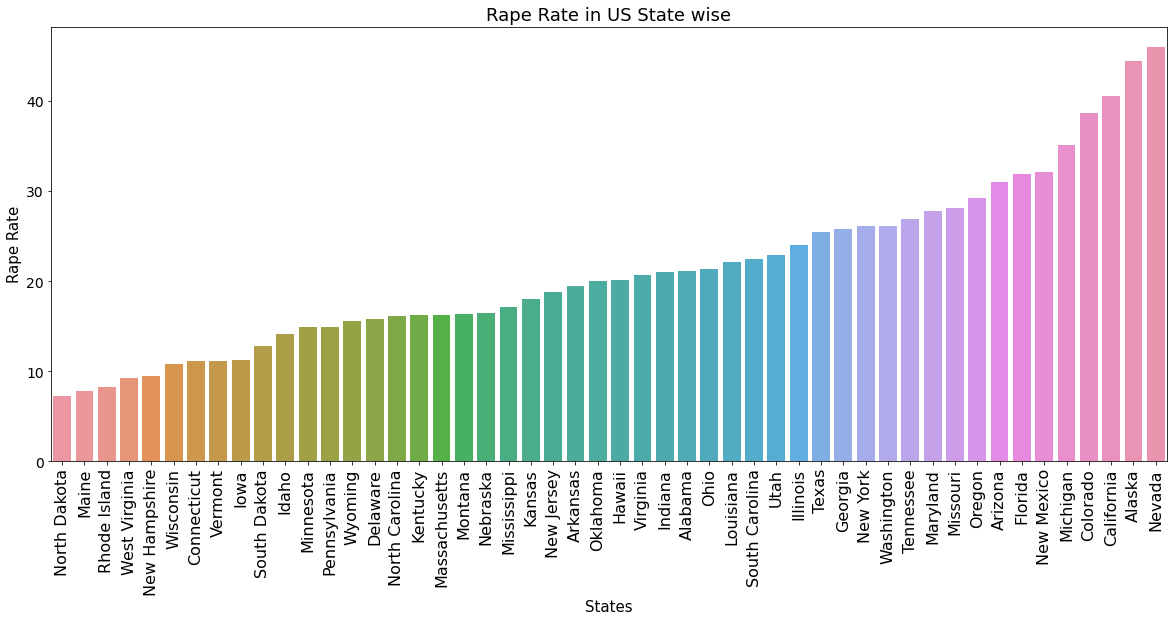

In [38]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='States',
            y="Rape", 
            data=crime, 
            order=crime.sort_values('Rape').States)
# set labels
plt.xlabel("States", size=15)
plt.ylabel("Rape Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Rape Rate in US State wise", size=18)
plt.show()

In [39]:
print('Top 10 States with Highest Rape Rate')
crime.sort_values('Rape',ascending=False, ignore_index=True).head(10)

Top 10 States with Highest Rape Rate


States  Murder  Assault  UrbanPop  Rape
0  Nevada      12.2    252      81        46.0
1  Alaska      10.0    263      48        44.5
2  California  9.0     276      91        40.6
3  Colorado    7.9     204      78        38.7
4  Michigan    12.1    255      74        35.1
5  New Mexico  11.4    285      70        32.1
6  Florida     15.4    335      80        31.9
7  Arizona     8.1     294      80        31.0
8  Oregon      4.9     159      67        29.3
9  Missouri    9.0     178      70        28.2

In [40]:
print('Top 10 States with Lowest Rape Rate')
crime.sort_values('Rape',ascending=True, ignore_index=True).head(10)

Top 10 States with Lowest Rape Rate


States  Murder  Assault  UrbanPop  Rape
0  North Dakota   0.8     45       44        7.3 
1  Maine          2.1     83       51        7.8 
2  Rhode Island   3.4     174      87        8.3 
3  West Virginia  5.7     81       39        9.3 
4  New Hampshire  2.1     57       56        9.5 
5  Wisconsin      2.6     53       66        10.8
6  Connecticut    3.3     110      77        11.1
7  Vermont        2.2     48       32        11.2
8  Iowa           2.2     56       57        11.3
9  South Dakota   3.8     86       45        12.8

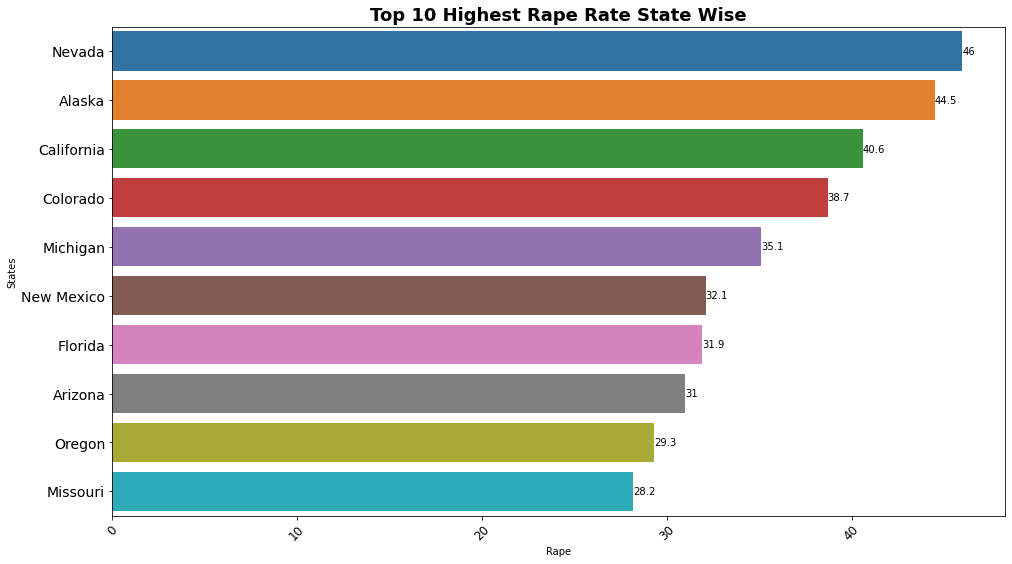

In [41]:
Rape = crime.sort_values('Rape', ascending = False)
plt.figure(figsize = (16,9))
ax = sns.barplot(x = Rape.Rape[:10], y = Rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Highest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

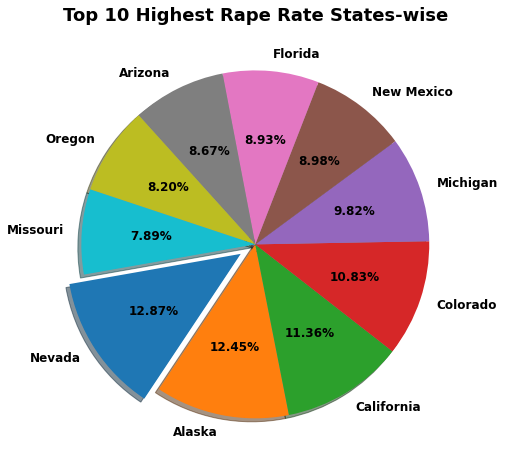

In [42]:
plt.figure(figsize = (8,8))
plt.pie(Rape.Rape[:10],
       labels=Rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

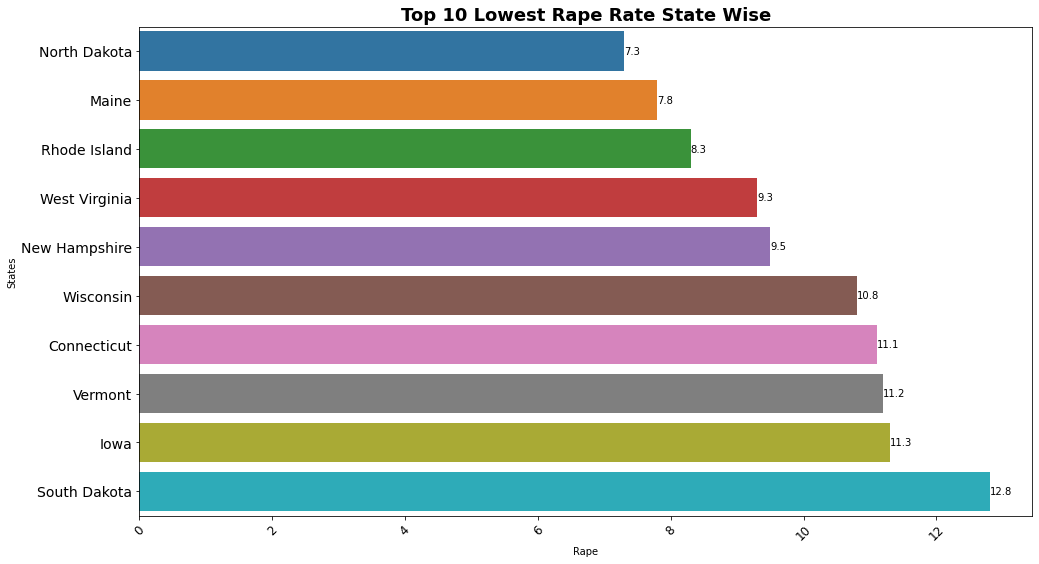

In [43]:
rape = crime.sort_values('Rape', ascending = True)
plt.figure(figsize = (16,9))
ax = sns.barplot(x = rape.Rape[:10], y = rape.States[:10])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Top 10 Lowest Rape Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

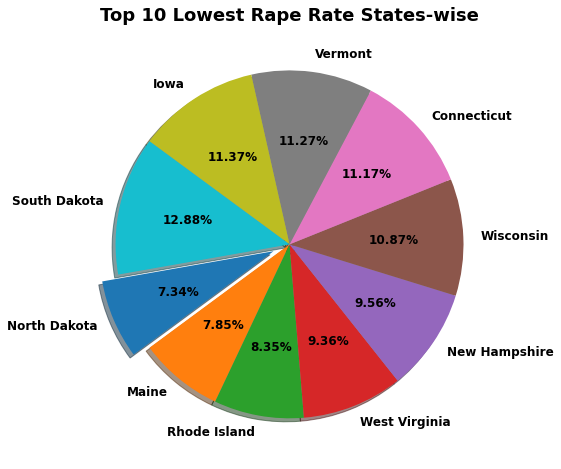

In [44]:
plt.figure(figsize = (8,8))
plt.pie(rape.Rape[:10],
       labels=rape.States[:10],
       explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 10 Lowest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

In [45]:
df = crime.set_index('States')
df.head()

Murder  Assault  UrbanPop  Rape
States                                     
Alabama     13.2    236      58        21.2
Alaska      10.0    263      48        44.5
Arizona     8.1     294      80        31.0
Arkansas    8.8     190      50        19.5
California  9.0     276      91        40.6

In [46]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [47]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

In [48]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             200.000000    
1   2             104.961633    
2   3             80.088861     
3   4             57.554259     
4   5             50.797995     
5   6             44.347436     
6   7             39.930058     
7   8             35.707843     
8   9             31.205411     
9   10            27.986377     
10  11            24.866338     
11  12            22.735987     
12  13            20.735709     
13  14            19.825955

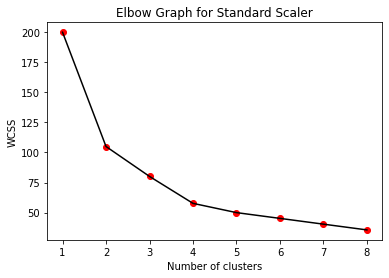

In [49]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

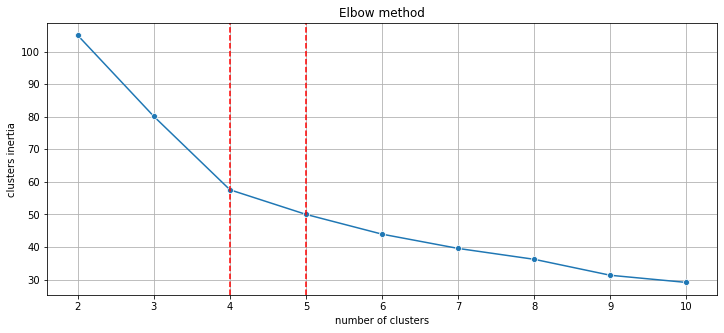

In [50]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(4, ls="--", c="red")
ax.axvline(5, ls="--", c="red")
plt.grid()
plt.show()

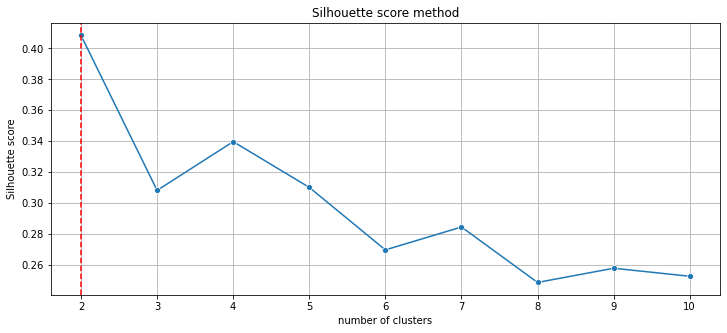

In [51]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [52]:
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.3396889143334439
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3095091512791688
For n_clusters = 4 The average silhouette_score is : 0.3396889143334439
For n_clusters = 5 The average silhouette_score is : 0.30612803169146263
For n_clusters = 6 The average silhouette_score is : 0.29910456843899946
For n_clusters = 7 The average silhouette_score is : 0.23035904501364116
For n_clusters = 8 The average silhouette_score is : 0.2732934287338534
For n_clusters = 9 The average silhouette_score is : 0.2518939934580804


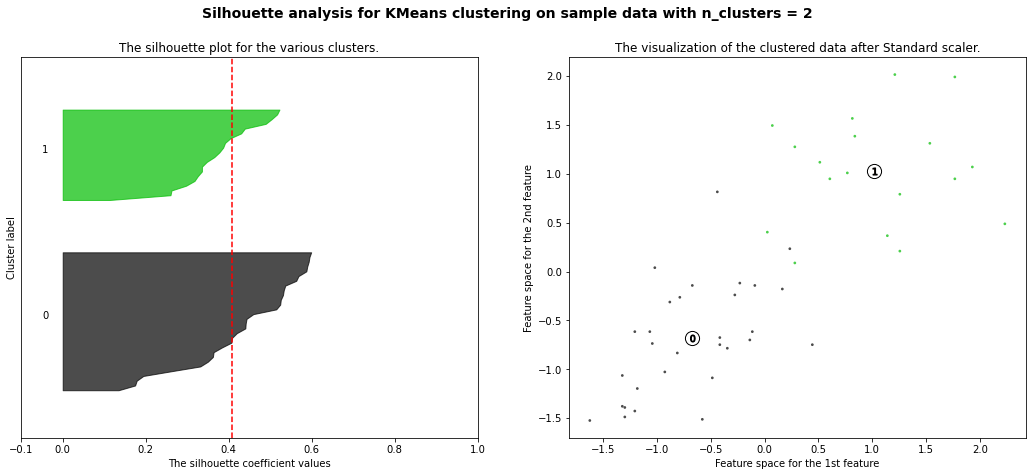

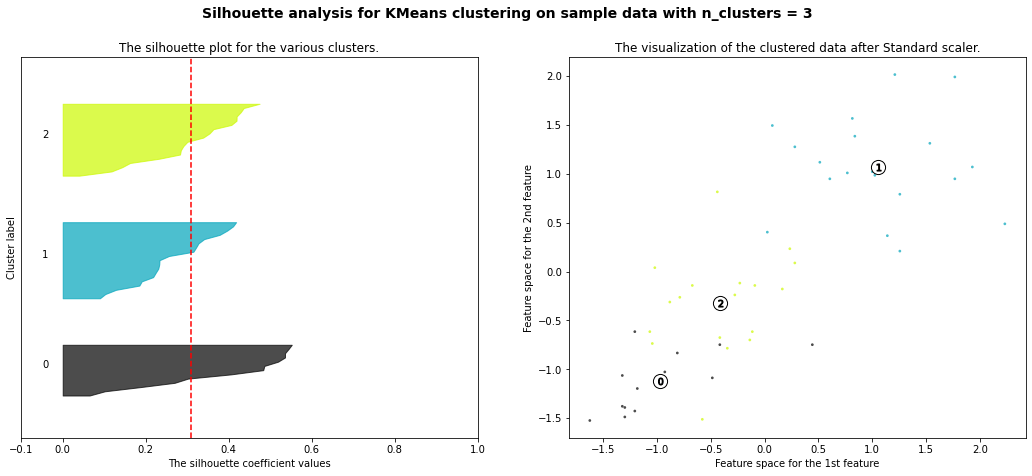

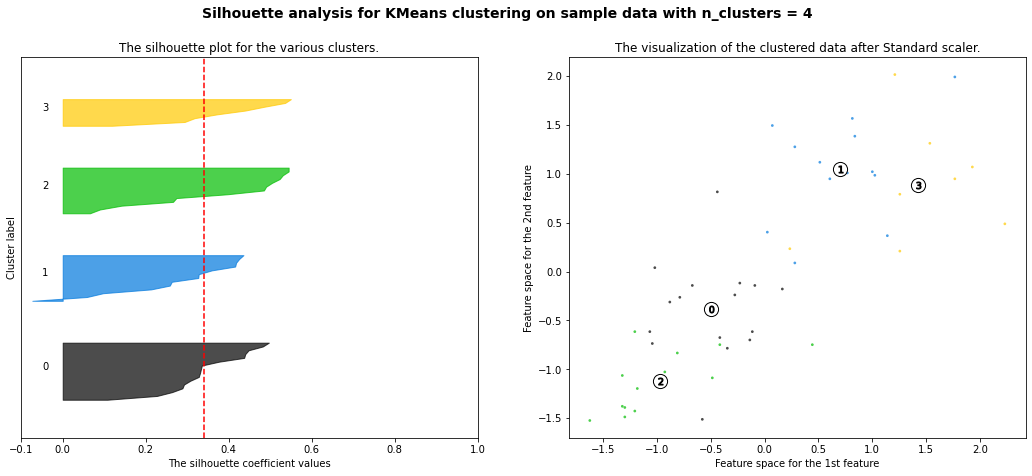

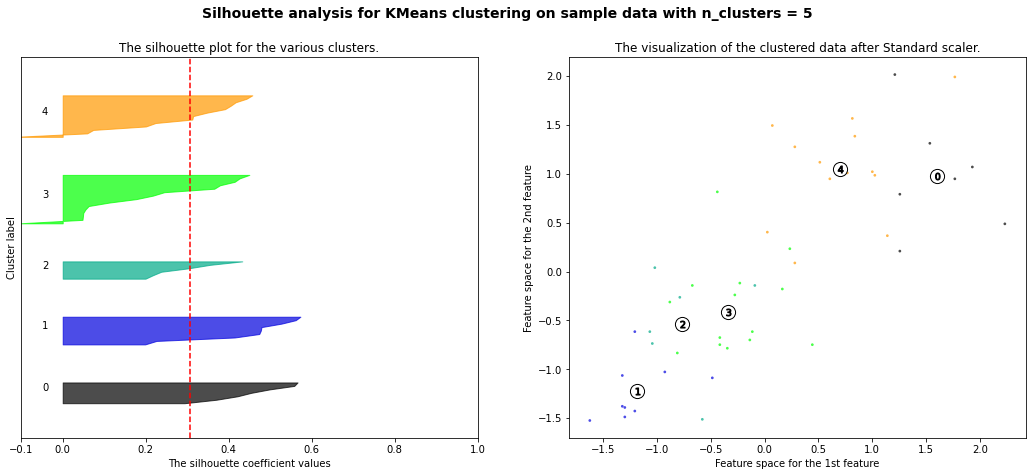

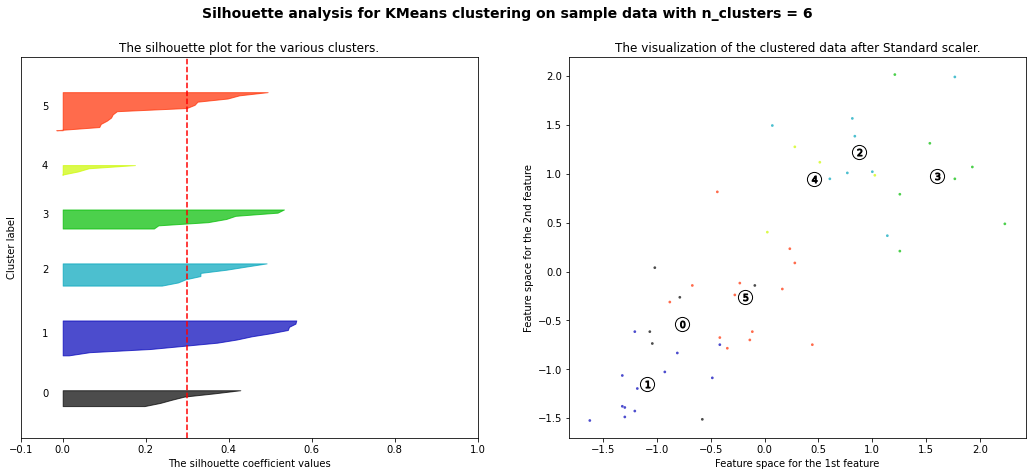

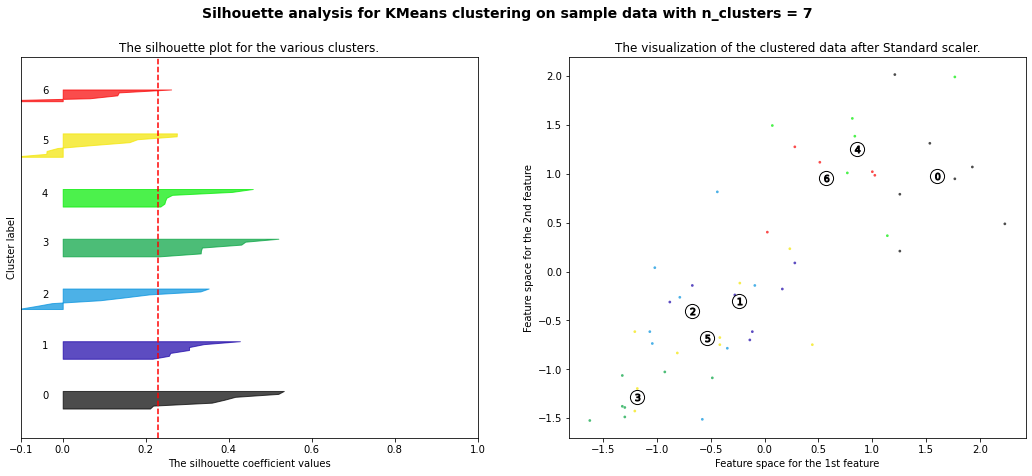

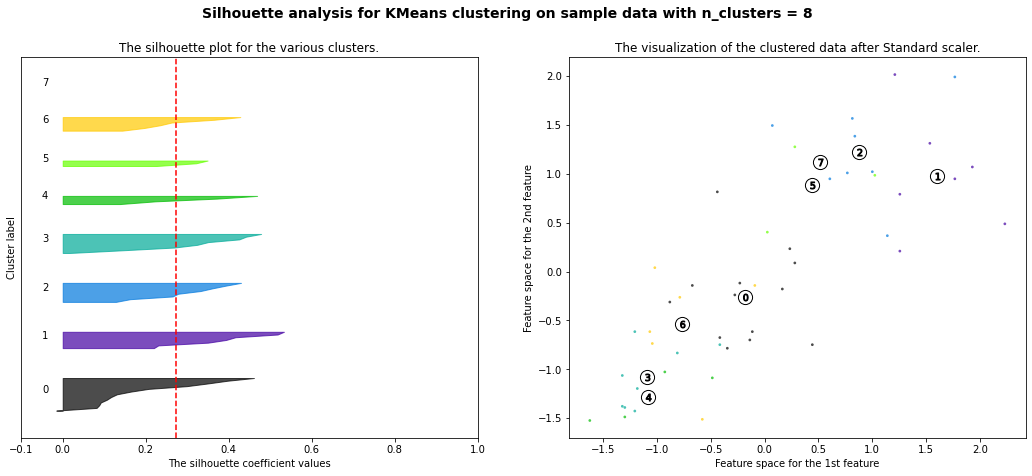

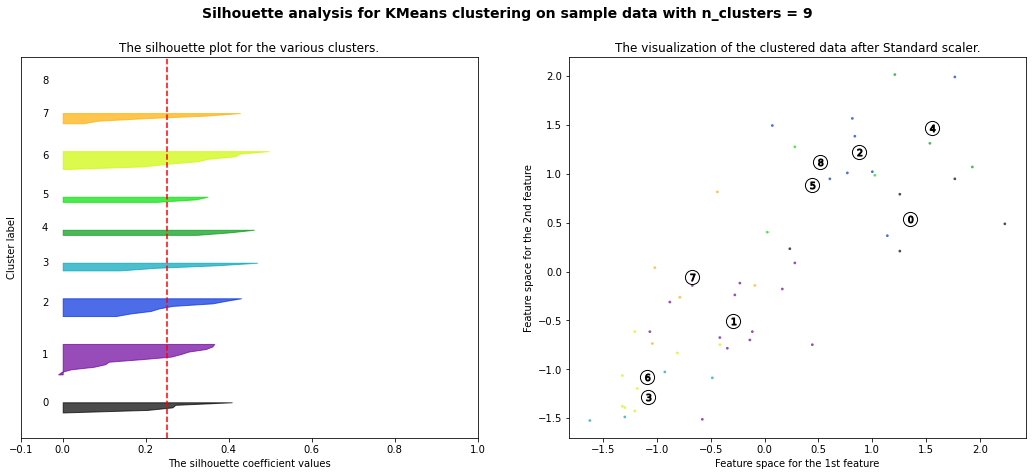

In [53]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,0], std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [54]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [55]:
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [56]:
model_kmeans.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [57]:
model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [58]:
model_kmeans.inertia_

80.0888613219962

In [59]:
df['Kmeans_label'] = model_kmeans.labels_
df.groupby('Kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                   mean        mean       mean       mean
Kmeans_label                                             
0             3.600000   78.538462   52.076923  12.176923
1             12.331579  259.315789  68.315789  29.215789
2             6.016667   143.888889  72.333333  19.344444

In [60]:
df[df['Kmeans_label']==0]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                      
Idaho          2.6     120      54        14.2  0           
Iowa           2.2     56       57        11.3  0           
Kentucky       9.7     109      52        16.3  0           
Maine          2.1     83       51        7.8   0           
Minnesota      2.7     72       66        14.9  0           
Montana        6.0     109      53        16.4  0           
Nebraska       4.3     102      62        16.5  0           
New Hampshire  2.1     57       56        9.5   0           
North Dakota   0.8     45       44        7.3   0           
South Dakota   3.8     86       45        12.8  0           
Vermont        2.2     48       32        11.2  0           
West Virginia  5.7     81       39        9.3   0           
Wisconsin      2.6     53       66        10.8  0

In [61]:
df[df['Kmeans_label']==1]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                       
Alabama         13.2    236      58        21.2  1           
Alaska          10.0    263      48        44.5  1           
Arizona         8.1     294      80        31.0  1           
California      9.0     276      91        40.6  1           
Colorado        7.9     204      78        38.7  1           
Florida         15.4    335      80        31.9  1           
Georgia         17.4    211      60        25.8  1           
Illinois        10.4    249      83        24.0  1           
Louisiana       15.4    249      66        22.2  1           
Maryland        11.3    300      67        27.8  1           
Michigan        12.1    255      74        35.1  1           
Mississippi     16.1    259      44        17.1  1           
Nevada          12.2    252      81        46.0  1           
New Mexico      11.4    285      70        32.1  1           
New York        11.1    254      86        26.1  1           
North Carolina  13.0    337      45        16.1  1           
South Carolina  14.4    279      48        22.5  1           
Tennessee       13.2    188      59        26.9  1           
Texas           12.7    201      80        25.5  1

In [62]:
df[df['Kmeans_label']==2]

Murder  Assault  UrbanPop  Rape  Kmeans_label
States                                                      
Arkansas       8.8     190      50        19.5  2           
Connecticut    3.3     110      77        11.1  2           
Delaware       5.9     238      72        15.8  2           
Hawaii         5.3     46       83        20.2  2           
Indiana        7.2     113      65        21.0  2           
Kansas         6.0     115      66        18.0  2           
Massachusetts  4.4     149      85        16.3  2           
Missouri       9.0     178      70        28.2  2           
New Jersey     7.4     159      89        18.8  2           
Ohio           7.3     120      75        21.4  2           
Oklahoma       6.6     151      68        20.0  2           
Oregon         4.9     159      67        29.3  2           
Pennsylvania   6.3     106      72        14.9  2           
Rhode Island   3.4     174      87        8.3   2           
Utah           3.2     120      80        22.9  2           
Virginia       8.5     156      63        20.7  2           
Washington     4.0     145      73        26.2  2           
Wyoming        6.8     161      60        15.6  2

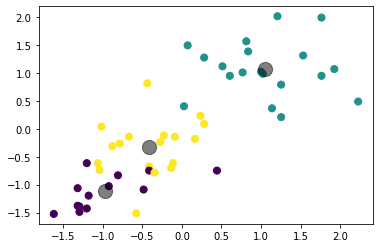

In [63]:
plt.scatter(std_df[:,0], std_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [64]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [65]:
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [66]:
model_kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [67]:
model_kmeans.cluster_centers_

array([[0.24518072, 0.23778539, 0.53615819, 0.22334195],
       [0.68463855, 0.72003425, 0.61694915, 0.56498708]])

In [68]:
model_kmeans.inertia_

6.596893867946196

In [69]:
df['Kmeans_label'] = model_kmeans.labels_

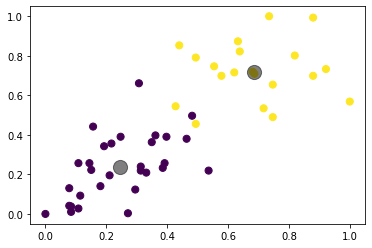

In [70]:
plt.scatter(minmax_df[:,0], minmax_df[:,1], c = model_kmeans.labels_, s = 50, cmap = "viridis")

centers = model_kmeans.cluster_centers_                                 
# We want to create 2 centers and show them on the visual.

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)

In [71]:
# Group data by Clusters (K=6)
df.groupby('Kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape
                mean        mean       mean       mean
Kmeans_label                                          
0             4.870   114.433333  63.633333  15.943333
1             12.165  255.250000  68.400000  29.165000

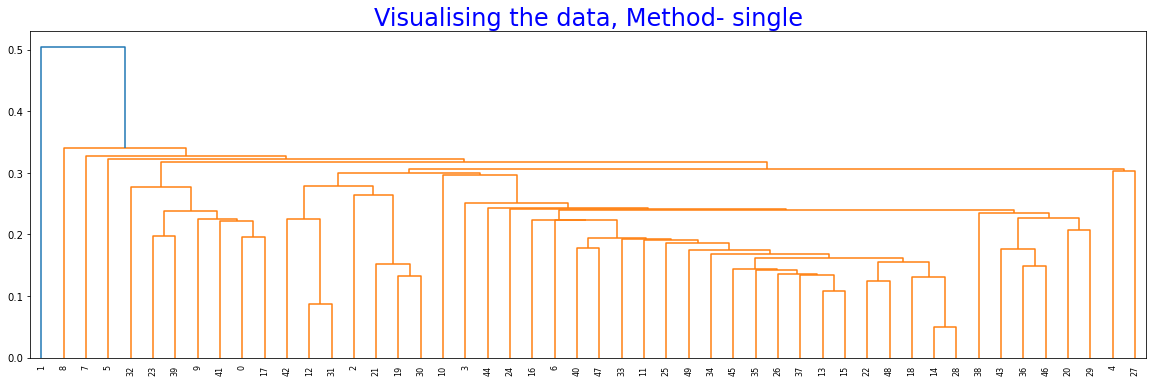

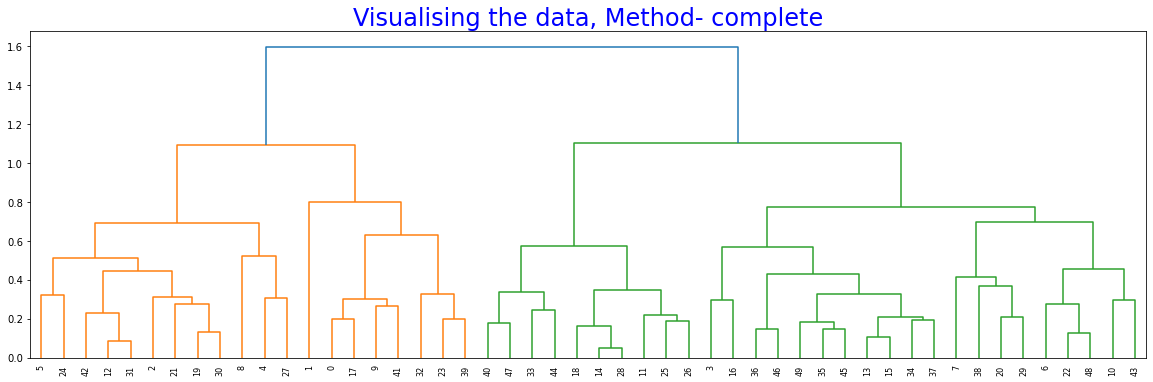

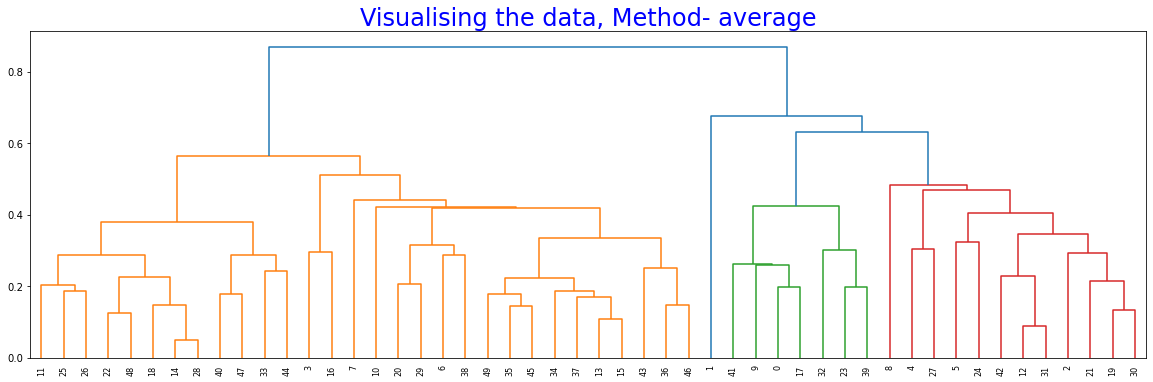

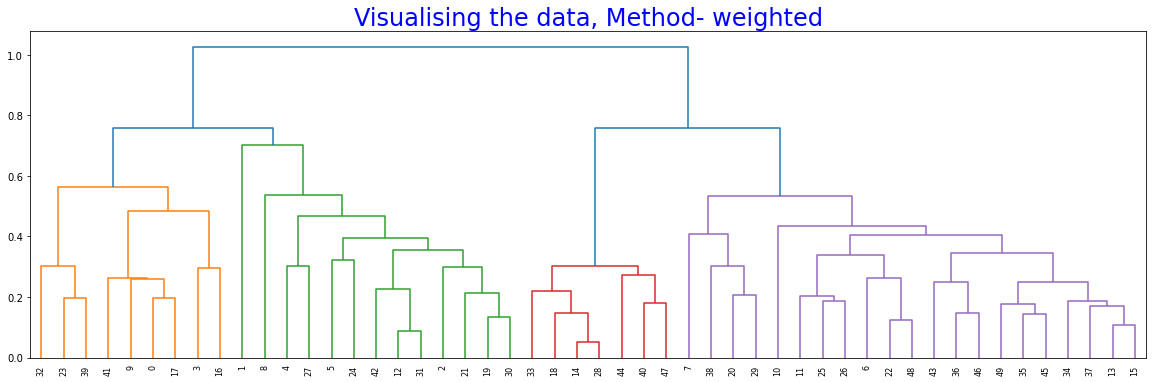

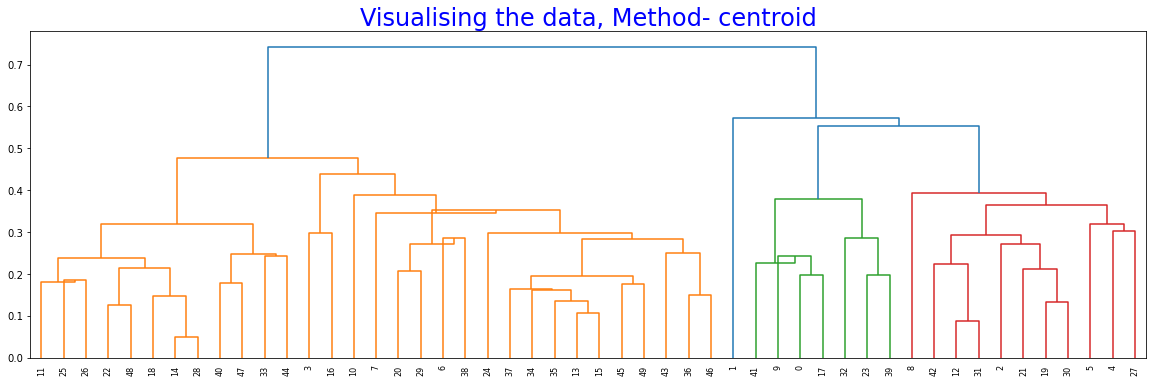

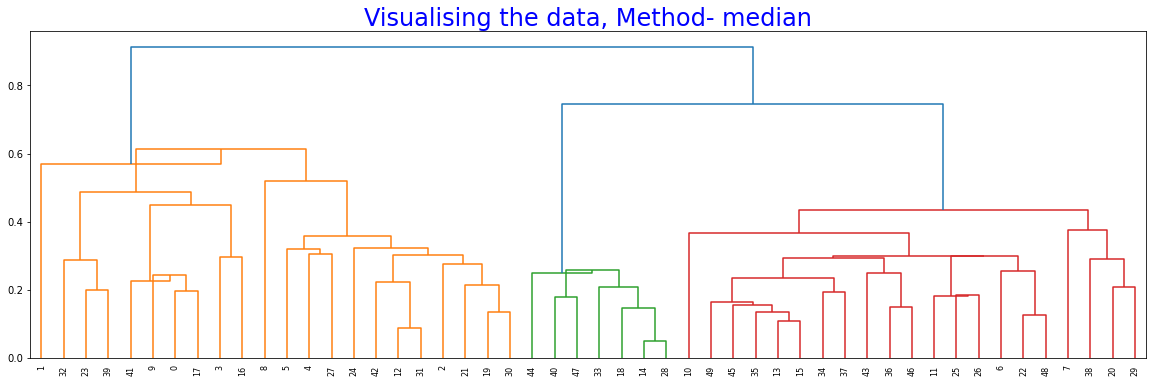

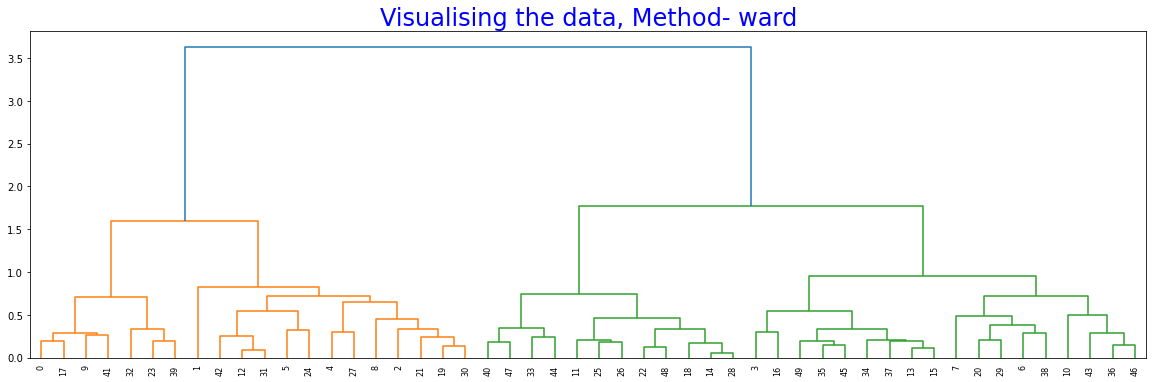

In [72]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [73]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31916915428121284
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.30877213909512063
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3298707379986785
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3060729442426308
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

In [74]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4047944502519567
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- single : 0.23455598753159795

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027895
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.36924314190439733
For n_clusters = 3 The average silhouette_score with linkage- average : 0.34863679190476177
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.3370187183556962
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31595507426164543
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3636819420151221

In [75]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(50,)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
agg_clustering.n_clusters_

2

In [77]:
(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.364

In [78]:
df['Hierarchical_labels'] = agg_clustering.labels_

In [79]:
df.groupby('Hierarchical_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label
                       mean        mean       mean       mean         mean
Hierarchical_labels                                                       
0                    4.870   114.433333  63.633333  15.943333  0.0        
1                    12.165  255.250000  68.400000  29.165000  1.0

<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Murder'>

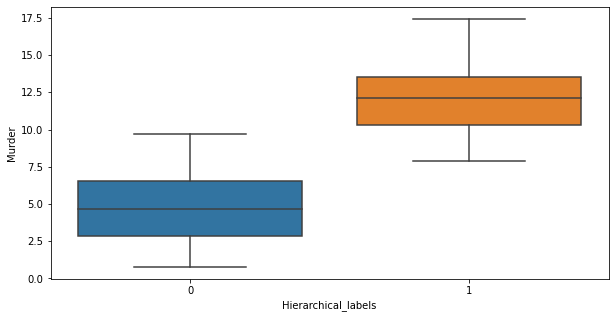

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Murder', data=df)

<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Assault'>

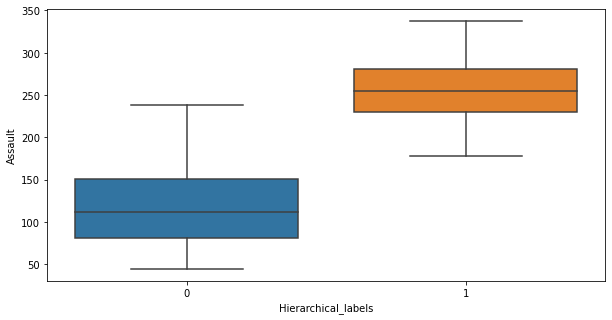

In [81]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Assault', data=df)

<AxesSubplot:xlabel='Hierarchical_labels', ylabel='Rape'>

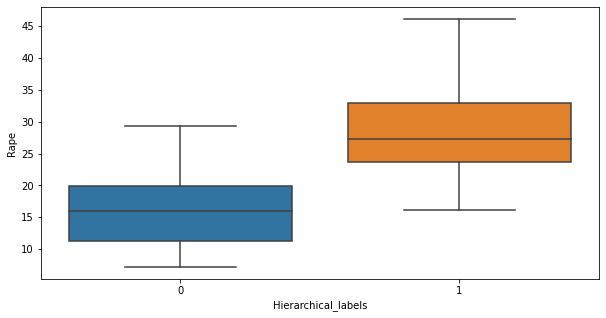

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hierarchical_labels', y='Rape', data=df)

In [83]:
from itertools import product

eps_values = np.arange(0.25,2,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [84]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


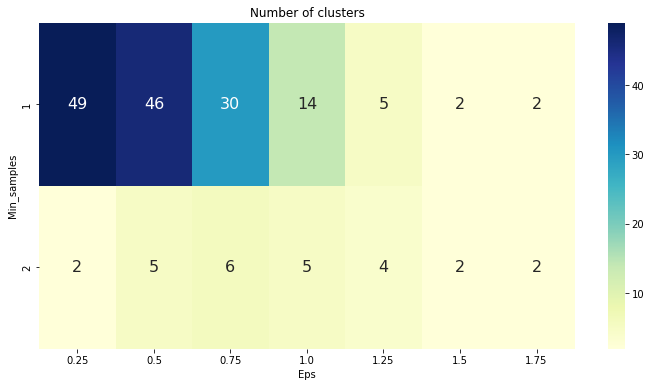

In [85]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

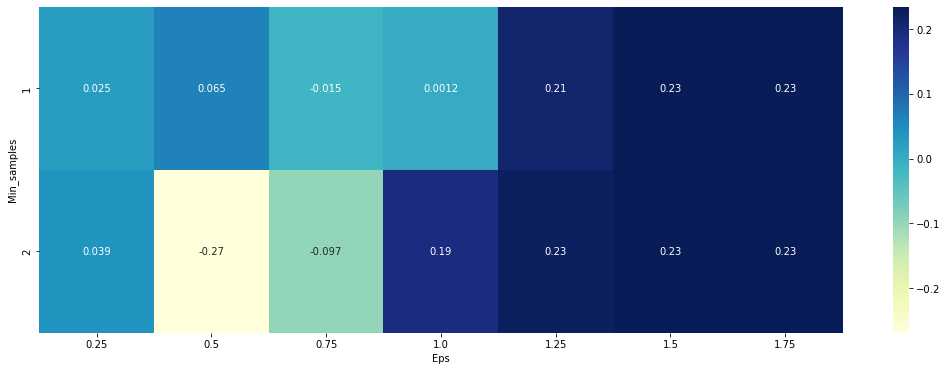

In [86]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [87]:
epsilon = [0.25,0.50,0.75,1,1.25,1.50,1.75,2]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2346


In [88]:
dbscan = DBSCAN(eps=1.5, min_samples=1) # min_samples = number of columns  or len(dataset.columns)* 3
dbscan.fit(std_df)

DBSCAN(eps=1.5, min_samples=1)

In [89]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  \
States                                                      
Alabama     13.2    236      58        21.2  1              
Alaska      10.0    263      48        44.5  1              
Arizona     8.1     294      80        31.0  1              
Arkansas    8.8     190      50        19.5  0              
California  9.0     276      91        40.6  1              

            Hierarchical_labels  DBSCAN_labels  
States                                          
Alabama     1                    0              
Alaska      1                    1              
Arizona     1                    0              
Arkansas    0                    0              
California  1                    0

In [91]:
df.groupby('DBSCAN_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0              7.742857   168.877551  65.897959  20.757143  0.387755      
1              10.000000  263.000000  48.000000  44.500000  1.000000      

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
0              0.387755            
1              1.000000

In [92]:
print("Silhouette Coefficient: %0.3f" % sil(std_df, dbscan.labels_))

Silhouette Coefficient: 0.235


In [93]:
from itertools import product

eps_values = np.arange(0.25,0.75,0.25) # eps values to be investigated
min_samples = np.arange(1,3)# min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [94]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(sil(minmax_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


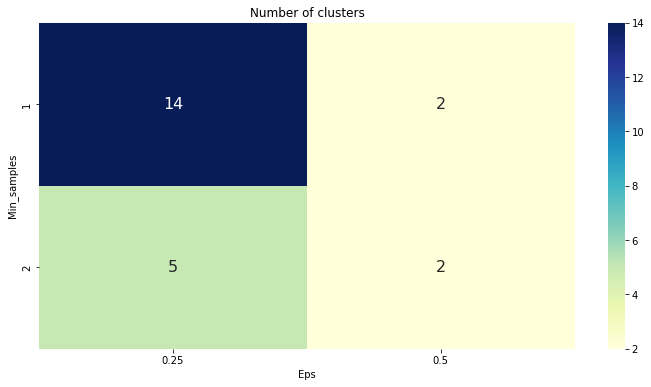

In [95]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

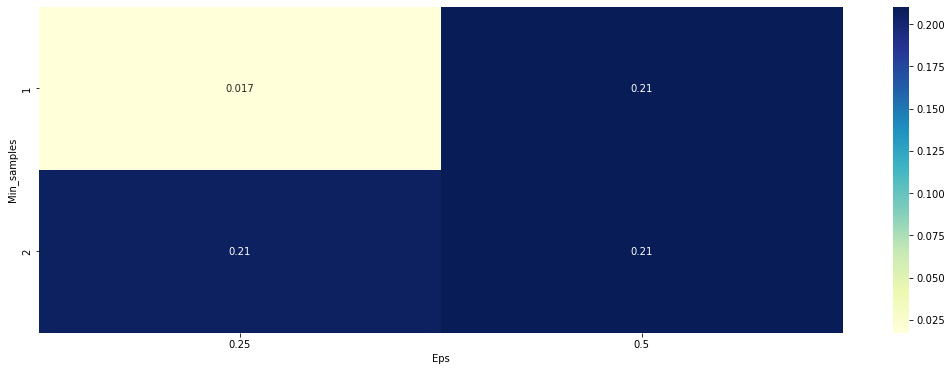

In [96]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [97]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


In [98]:
dbscan = DBSCAN(eps=0.5, min_samples=1) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [99]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [100]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

Murder  Assault  UrbanPop  Rape  Kmeans_label  \
States                                                      
Alabama     13.2    236      58        21.2  1              
Alaska      10.0    263      48        44.5  1              
Arizona     8.1     294      80        31.0  1              
Arkansas    8.8     190      50        19.5  0              
California  9.0     276      91        40.6  1              

            Hierarchical_labels  DBSCAN_labels  
States                                          
Alabama     1                    0              
Alaska      1                    1              
Arizona     1                    0              
Arkansas    0                    0              
California  1                    0

In [101]:
df.groupby('DBSCAN_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                    mean        mean       mean       mean         mean   
DBSCAN_labels                                                             
0              7.742857   168.877551  65.897959  20.757143  0.387755      
1              10.000000  263.000000  48.000000  44.500000  1.000000      

              Hierarchical_labels  
                             mean  
DBSCAN_labels                      
0              0.387755            
1              1.000000

In [102]:
cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [103]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
Murder               7.742857      10.0        
Assault              168.877551    263.0       
UrbanPop             65.897959     48.0        
Rape                 20.757143     44.5        
Kmeans_label         0.387755      1.0         
Hierarchical_labels  0.387755      1.0         
DBSCAN_labels        0.000000      1.0

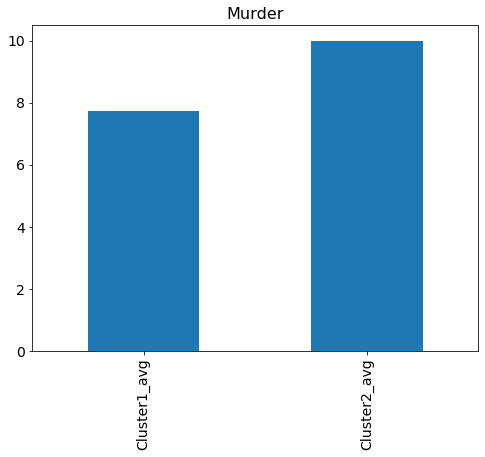

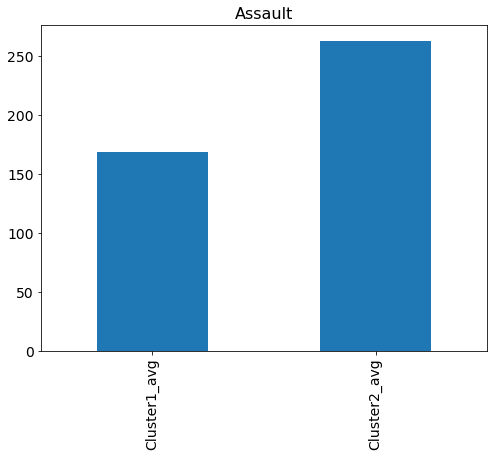

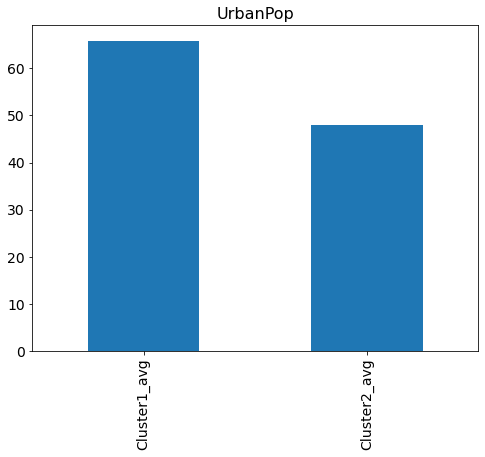

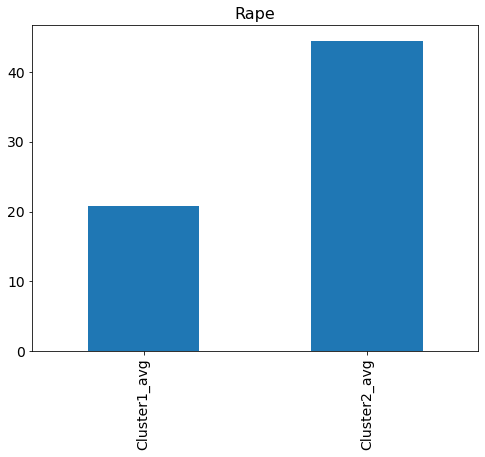

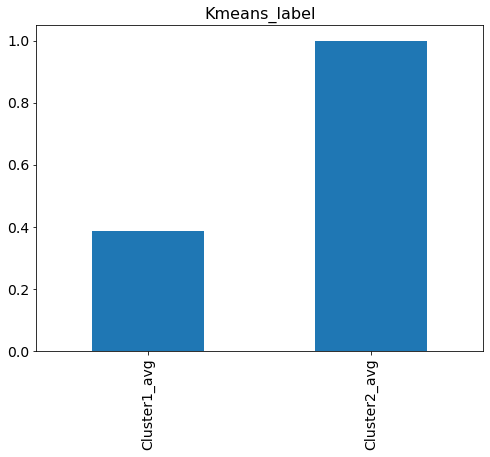

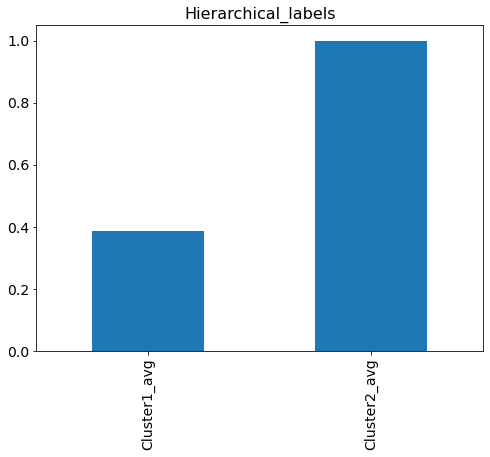

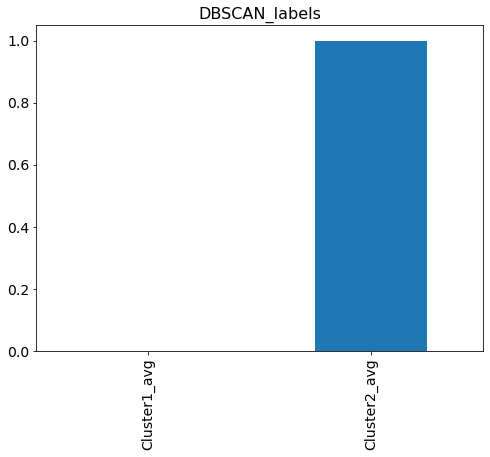

In [104]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

# Q2
- Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
- Draw the inferences from the clusters obtained.

- Data Description:
 
- The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year.
- The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

- ID --Unique ID

- Balance--Number of miles eligible for award travel

- Qual_mile--Number of miles counted as qualifying for Topflight status

- cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
- cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
- cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

- 1 = under 5,000
- 2 = 5,000 - 10,000
- 3 = 10,001 - 25,000
- 4 = 25,001 - 50,000
- 5 = over 50,000

- Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

- Bonus_trans--Number of non-flight bonus transactions in the past 12 months

- Flight_miles_12mo--Number of flight miles in the past 12 months

- Flight_trans_12--Number of flight transactions in the past 12 months

- Days_since_enrolled--Number of days since enrolled in flier program

- Award--whether that person had award flight (free flight) or not


 

In [105]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [106]:
data = pd.read_excel("D:\Data Science Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1     28143    0           1          1          1          174           
1     2     19244    0           1          1          1          215           
2     3     41354    0           1          1          1          4123          
3     4     14776    0           1          1          1          500           
4     5     97752    0           4          1          1          43300         
...  ..       ...   ..          ..         ..         ..            ...         
3994  4017  18476    0           1          1          1          8525          
3995  4018  64385    0           1          1          1          981           
3996  4019  73597    0           3          1          1          25447         
3997  4020  54899    0           1          1          1          500           
3998  4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3994  4            200                1                1403                
3995  5            0                  0                1395                
3996  8            0                  0                1402                
3997  1            500                1                1401                
3998  0            0                  0                1398                

      Award?  
0     0       
1     0       
2     0       
3     0       
4     1       
...  ..       
3994  1       
3995  1       
3996  1       
3997  0       
3998  0       

[3999 rows x 12 columns]

In [107]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [108]:
# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  
ID           
1     0      
2     0      
3     0      
4     0      
5     1      
...  ..      
4017  1      
4018  1      
4019  1      
4020  0      
4021  0      

[3999 rows x 11 columns]

In [109]:
data.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03  3999.000000   3999.000000  3999.000000  3999.000000   
mean   7.360133e+04  144.114529    2.059515     1.014504     1.012253      
std    1.007757e+05  773.663804    1.376919     0.147650     0.195241      
min    0.000000e+00  0.000000      1.000000     1.000000     1.000000      
25%    1.852750e+04  0.000000      1.000000     1.000000     1.000000      
50%    4.309700e+04  0.000000      1.000000     1.000000     1.000000      
75%    9.240400e+04  0.000000      3.000000     1.000000     1.000000      
max    1.704838e+06  11148.000000  5.000000     3.000000     5.000000      

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000    3999.00000   3999.000000        3999.000000       
mean   17144.846212   11.60190     460.055764         1.373593          
std    24150.967826   9.60381      1400.209171        3.793172          
min    0.000000       0.00000      0.000000           0.000000          
25%    1250.000000    3.00000      0.000000           0.000000          
50%    7171.000000    12.00000     0.000000           0.000000          
75%    23800.500000   17.00000     311.000000         1.000000          
max    263685.000000  86.00000     30817.000000       53.000000         

       Days_since_enroll        Award  
count  3999.00000         3999.000000  
mean   4118.55939         0.370343     
std    2065.13454         0.482957     
min    2.00000            0.000000     
25%    2330.00000         0.000000     
50%    4096.00000         0.000000     
75%    5790.50000         1.000000     
max    8296.00000         1.000000

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [111]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [112]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


In [113]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


In [114]:
data.duplicated().sum()

1

In [115]:
data[data.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
3899  1000     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
3899  0            0                  0                1597                

      Award  
ID           
3899  0

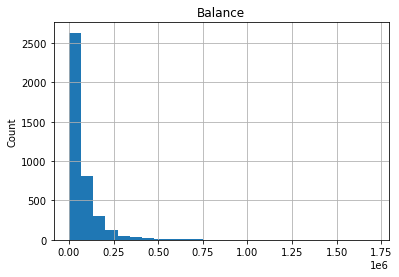

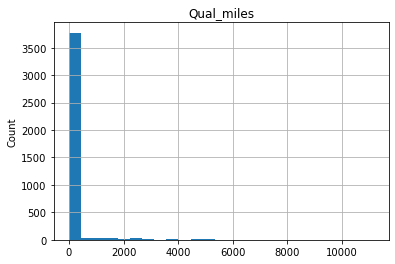

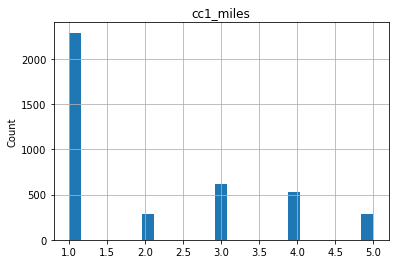

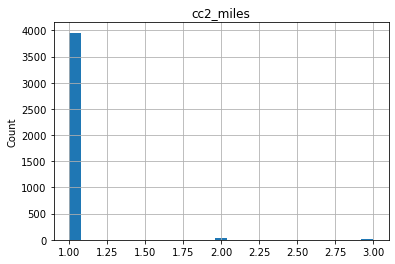

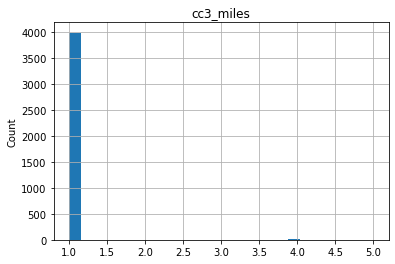

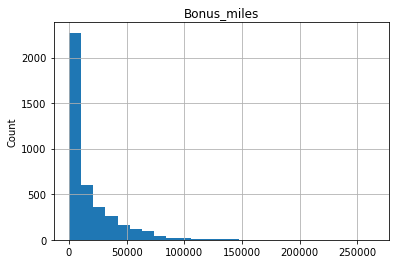

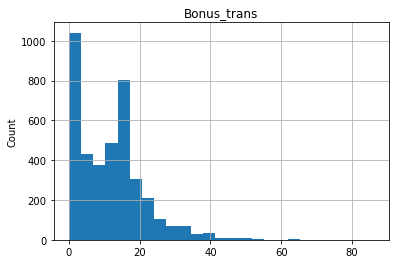

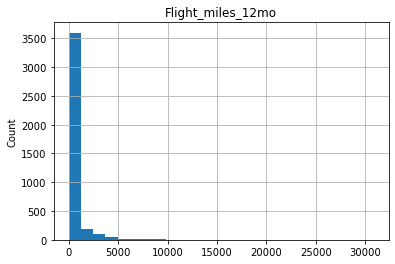

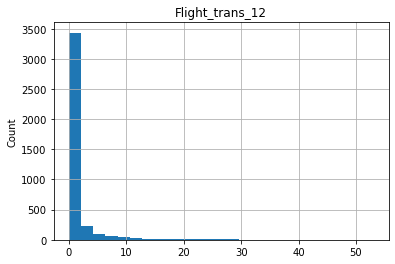

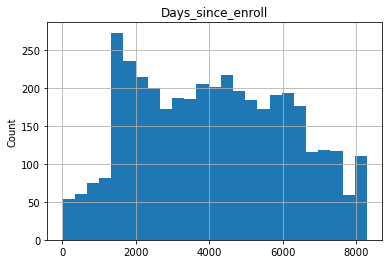

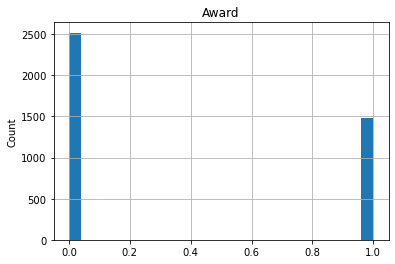

In [116]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


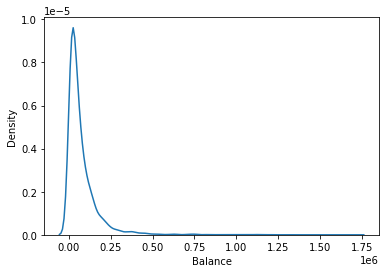

Qual_miles


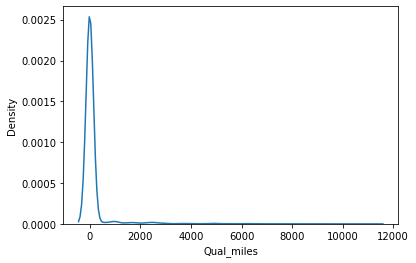

cc1_miles


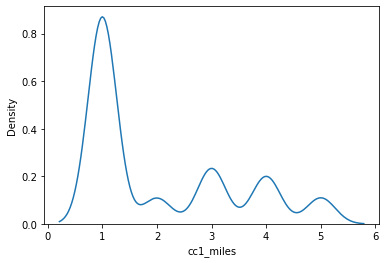

cc2_miles


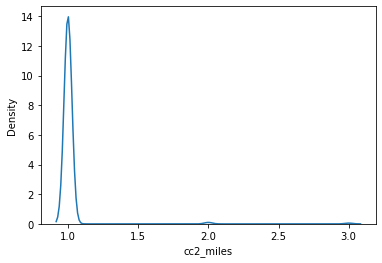

cc3_miles


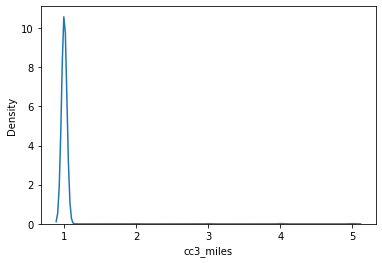

Bonus_miles


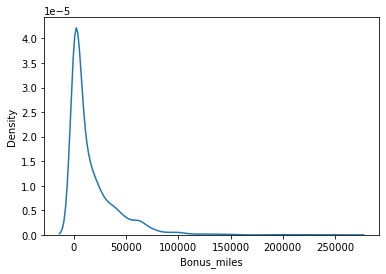

Bonus_trans


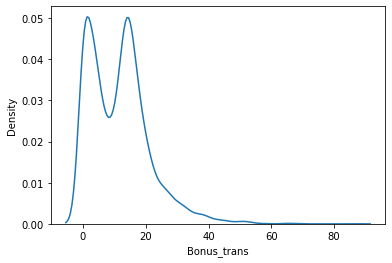

Flight_miles_12mo


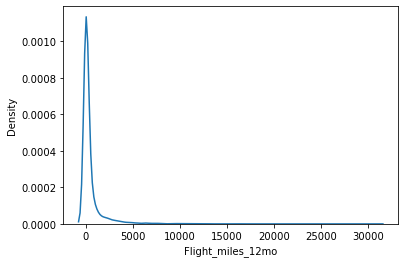

Flight_trans_12


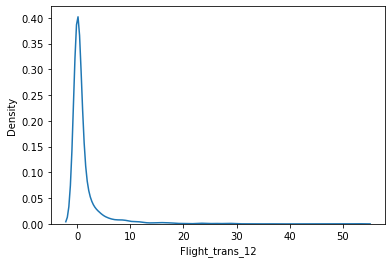

Days_since_enroll


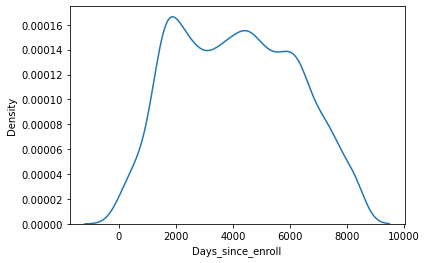

Award


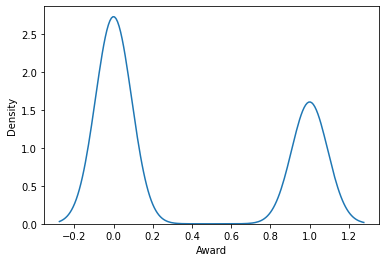

In [117]:
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

In [118]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

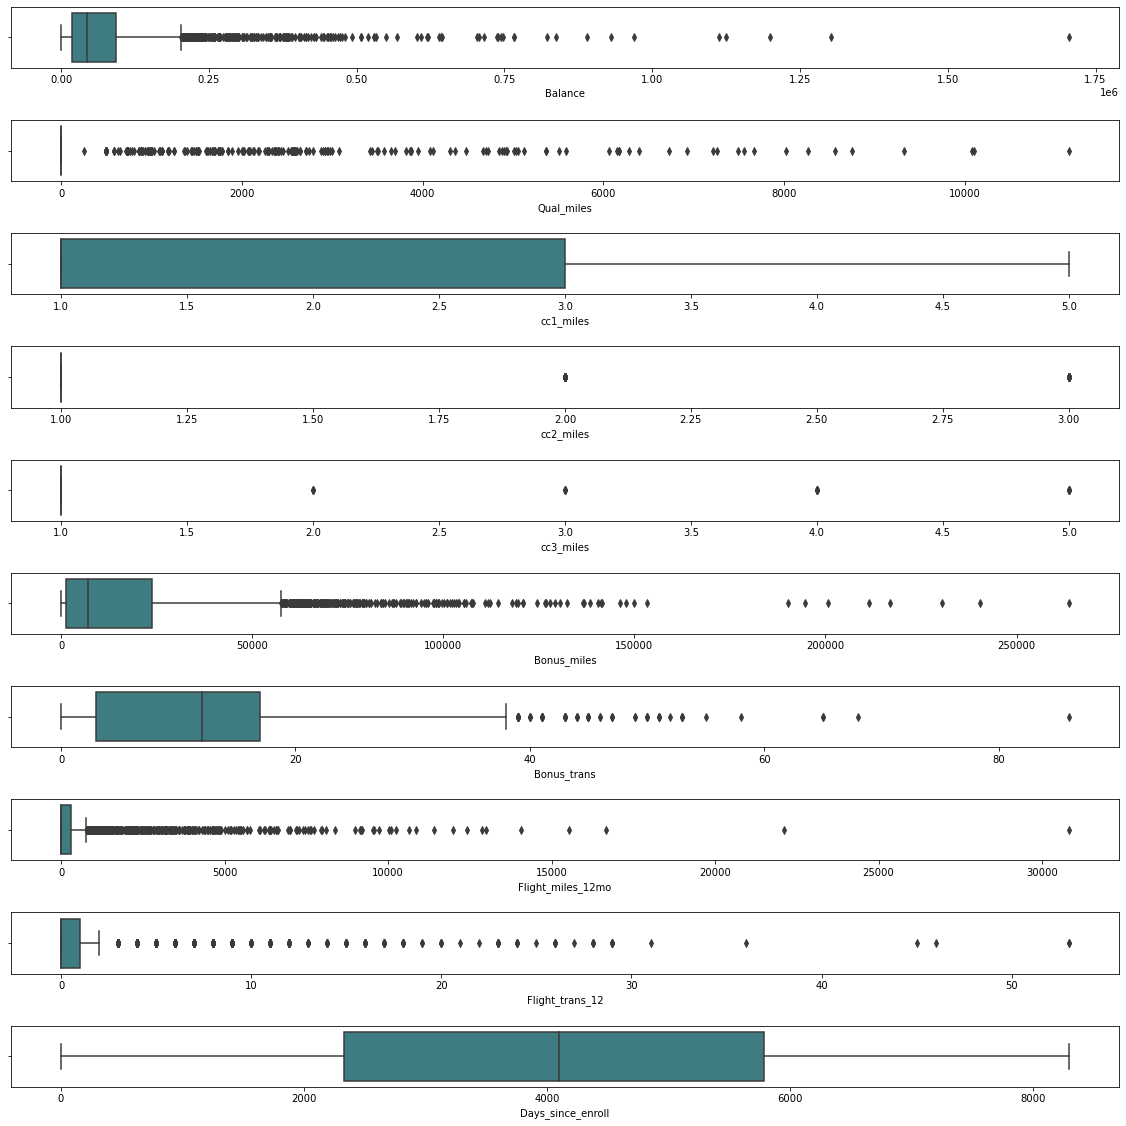

In [119]:
ot=data.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

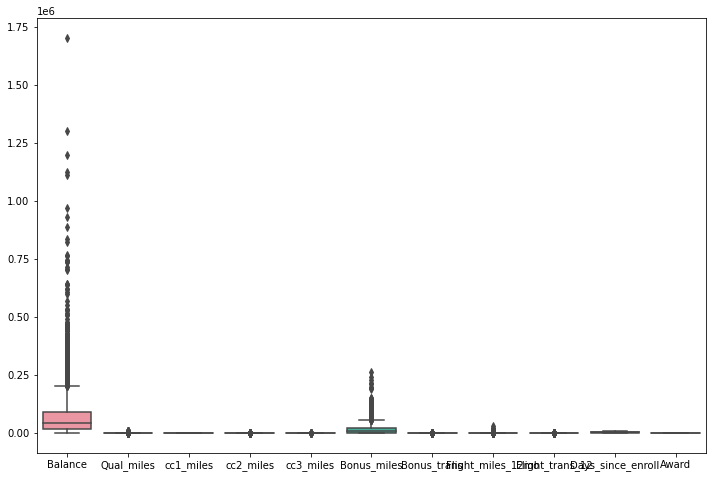

In [120]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<AxesSubplot:>

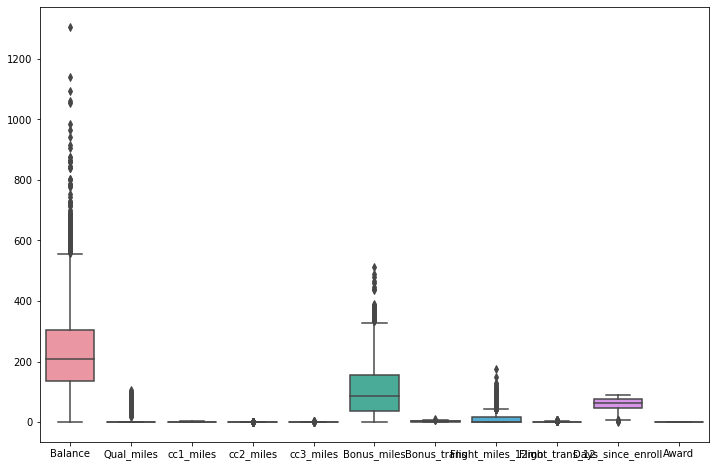

In [121]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

In [122]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.97%
Percentage of Customer does have a Award: 37.03%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

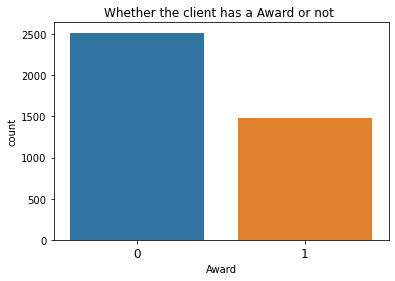

In [123]:
sns.countplot(x='Award', data=data, 
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

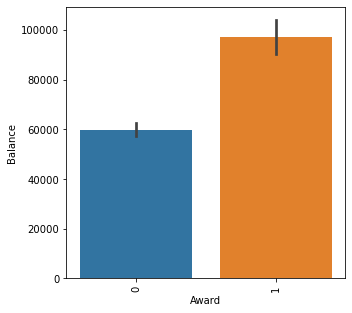

In [124]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [125]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

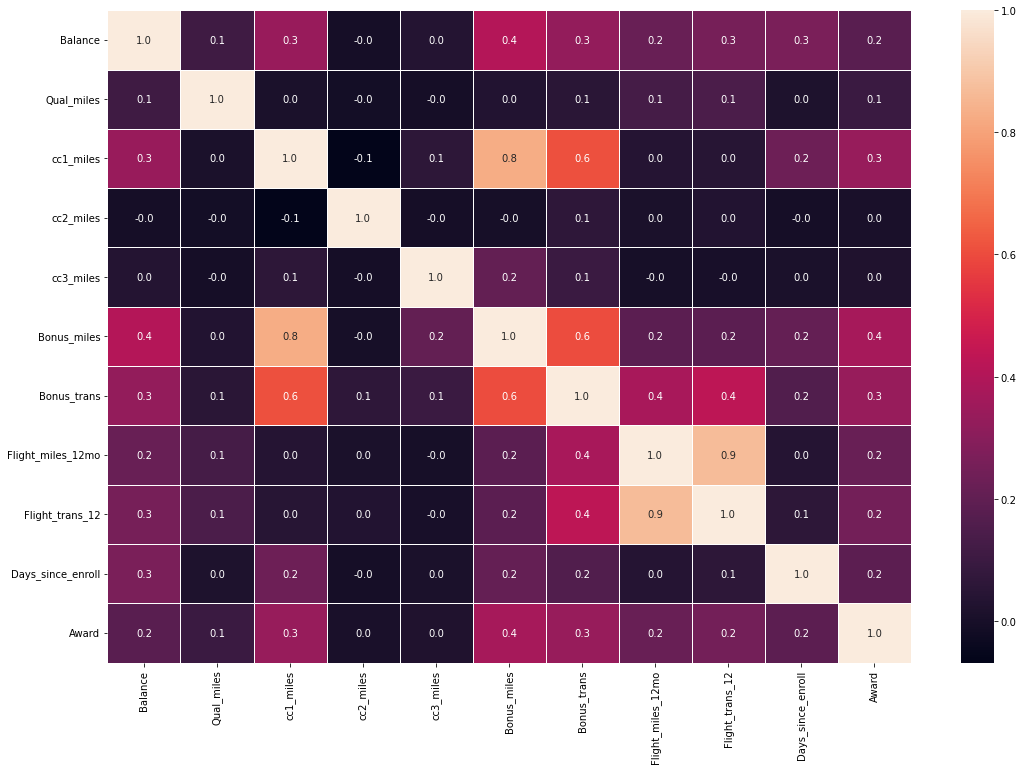

In [126]:
f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

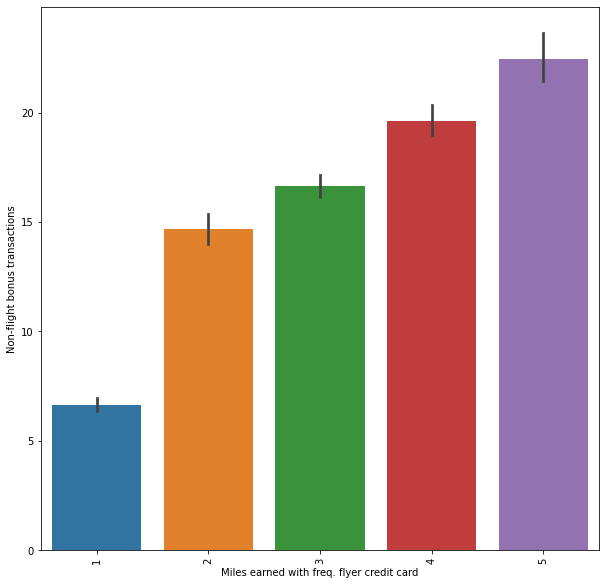

In [127]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [128]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3999, 11)

In [129]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3999, 11)

In [130]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             43989.000000  
1   2             35409.516630  
2   3             30899.216409  
3   4             28289.222335  
4   5             25177.422387  
5   6             22586.072271  
6   7             18891.926703  
7   8             17369.058674  
8   9             15967.331864  
9   10            14727.077755  
10  11            13705.544028  
11  12            12946.634447  
12  13            12424.632801  
13  14            11971.952530

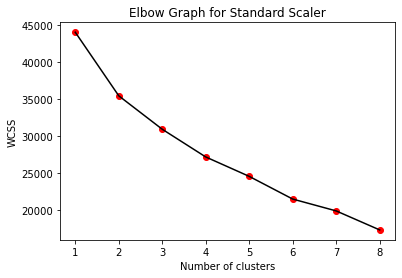

In [131]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [132]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

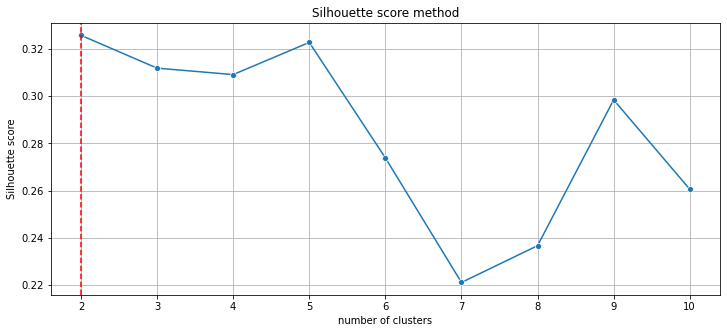

In [133]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [134]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


For n_clusters = 2 The average silhouette_score is : 0.3256981835090824
For n_clusters = 3 The average silhouette_score is : 0.3121716765282414
For n_clusters = 4 The average silhouette_score is : 0.32563311512799126
For n_clusters = 5 The average silhouette_score is : 0.31819537664378844
For n_clusters = 6 The average silhouette_score is : 0.3338735662323181
For n_clusters = 7 The average silhouette_score is : 0.22085896619040385
For n_clusters = 8 The average silhouette_score is : 0.23657639934232003
For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


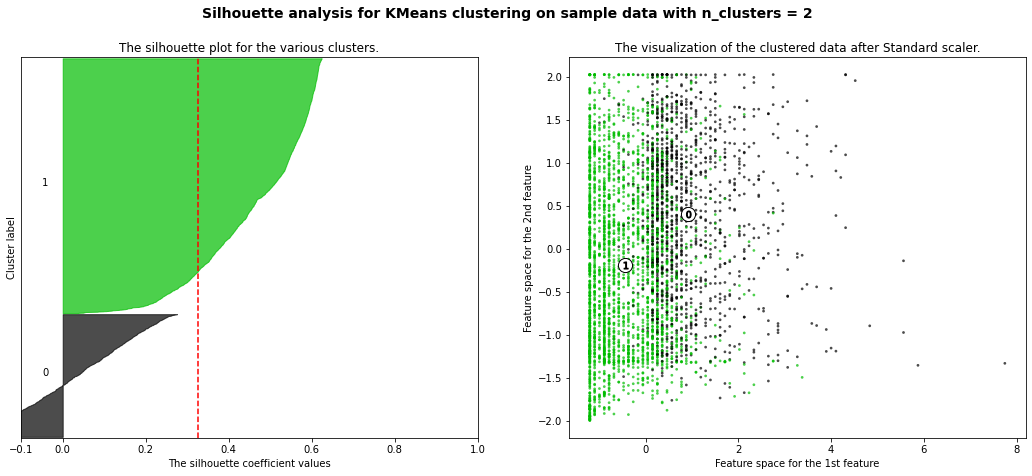

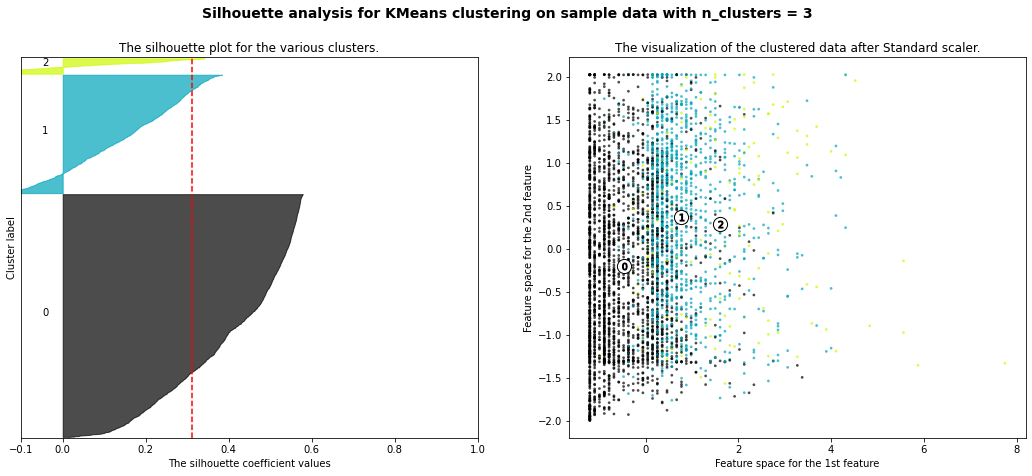

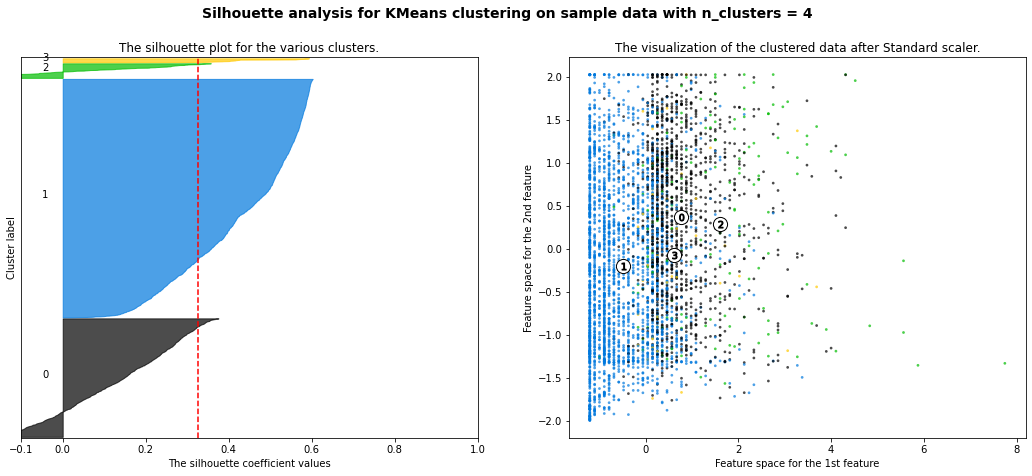

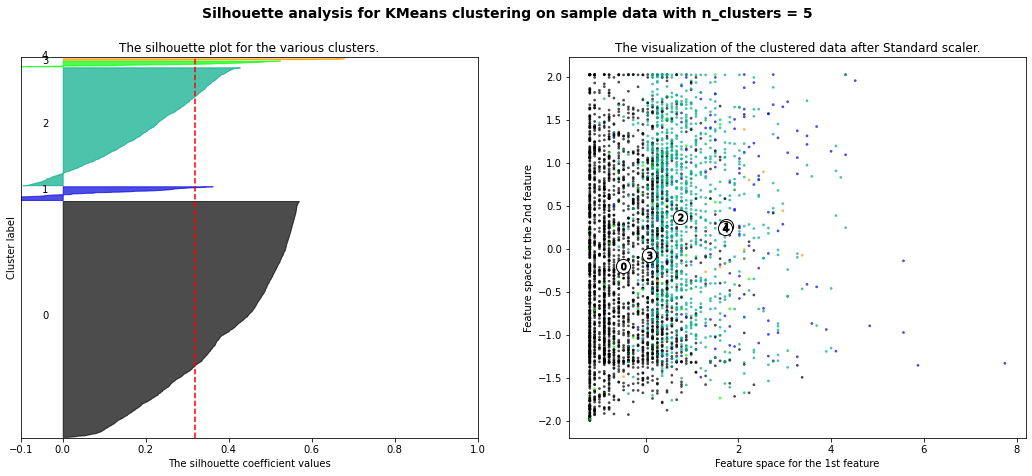

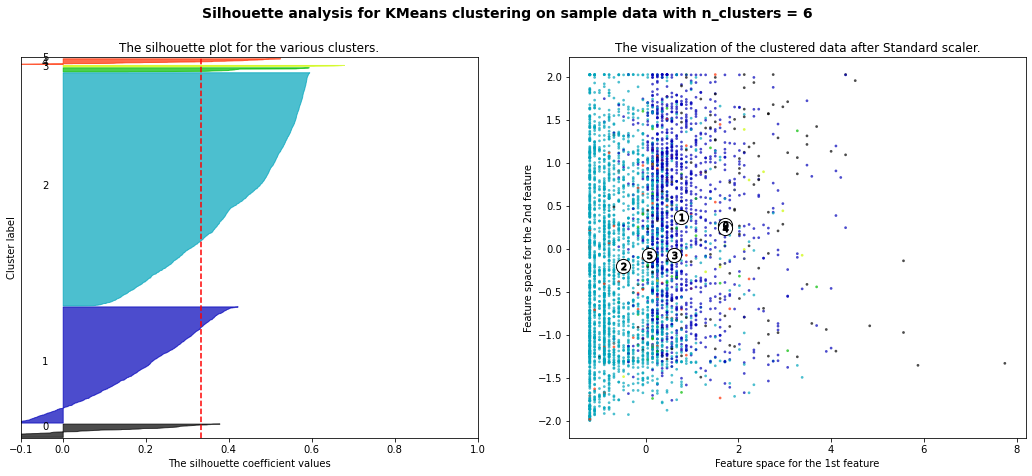

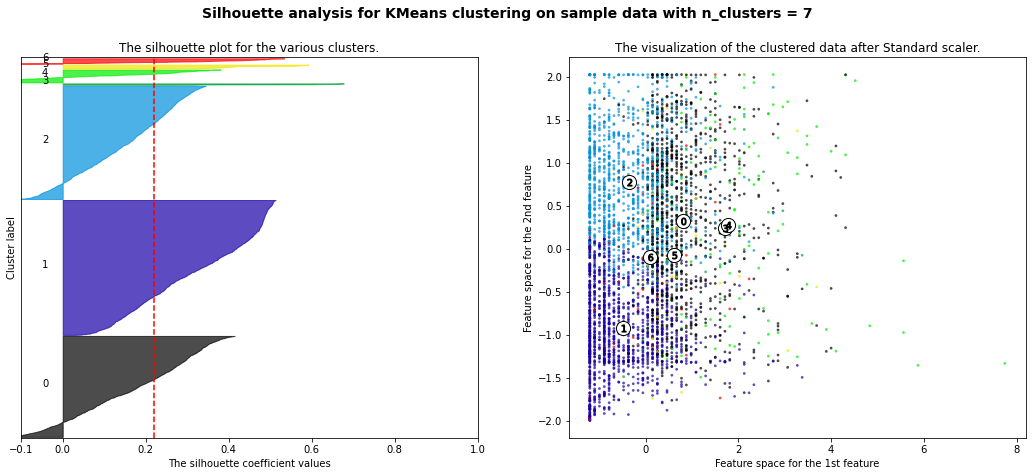

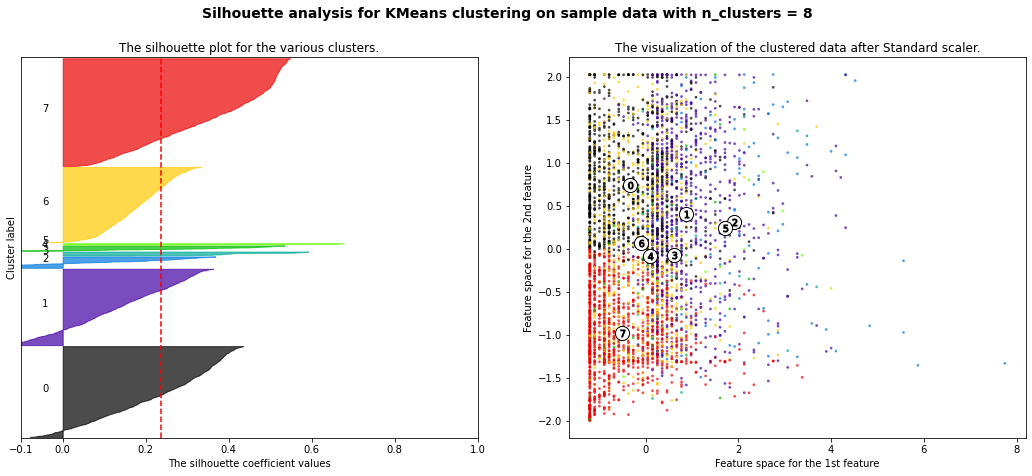

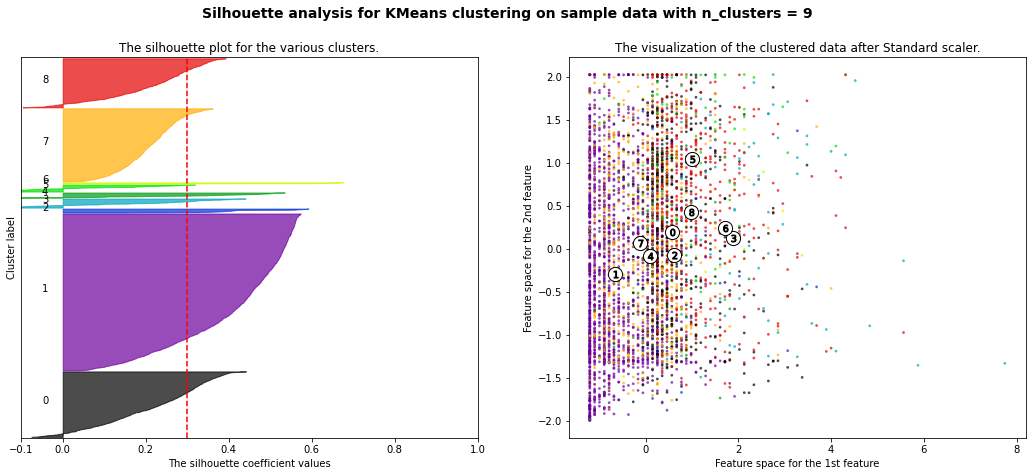

In [135]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [136]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3999,)

In [137]:
y_predict_kmeans


array([2, 2, 2, ..., 1, 2, 2])

In [138]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [139]:
model_kmeans.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [140]:
model_kmeans.inertia_

21089.97362892964

In [141]:
#Assign clusters to the data set

data['Kmeans_label'] = model_kmeans.labels_

In [142]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])


Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean         mean      mean      mean      mean   
Kmeans_label                                                             
0             188155.664336  464.573427   2.244755  1.000000  1.000000   
1             117176.916331  58.446500    3.720837  1.000000  1.001609   
2             43882.372895   43.558140    1.229751  1.000000  1.000401   
3             68876.581395   23.255814    1.139535  2.348837  1.000000   
4             138061.400000  78.800000    3.466667  1.000000  4.066667   
5             119660.491803  5351.065574  2.000000  1.000000  1.000000   

               Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                      mean        mean              mean            mean   
Kmeans_label                                                               
0             32995.580420  27.979021   5739.692308       16.552448        
1             39485.872084  18.811746   346.617860        1.032180         
2             4644.210104   6.852847    199.160385        0.621091         
3             14689.837209  17.534884   582.627907        2.209302         
4             93927.866667  28.066667   506.666667        1.600000         
5             18683.475410  12.229508   963.639344        2.868852         

             Days_since_enroll     Award  
                          mean      mean  
Kmeans_label                              
0             4679.251748       0.797203  
1             4887.485921       0.649236  
2             3706.378508       0.200882  
3             3968.930233       0.395349  
4             4613.866667       0.533333  
5             3971.491803       0.557377

In [143]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             1830.793213   
1   2             823.675698    
2   3             625.176821    
3   4             436.708858    
4   5             348.943322    
5   6             315.315330    
6   7             287.928960    
7   8             263.046776    
8   9             243.924436    
9   10            226.125332    
10  11            214.830358    
11  12            204.108751    
12  13            201.280659    
13  14            189.350487

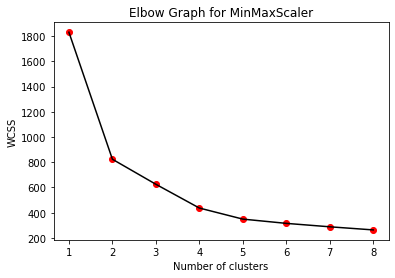

In [144]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

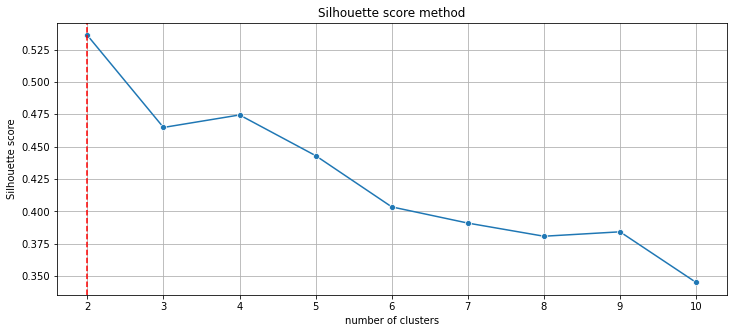

In [145]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [146]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.4744941579482721
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.3886585998922838
For n_clusters = 7 The average silhouette_score is : 0.3909601011818369
For n_clusters = 8 The average silhouette_score is : 0.38030165896247936
For n_clusters = 9 The average silhouette_score is : 0.3842538055607832


For n_clusters = 2 The average silhouette_score is : 0.535930510919477
For n_clusters = 3 The average silhouette_score is : 0.46484529388583046
For n_clusters = 4 The average silhouette_score is : 0.47483765255961
For n_clusters = 5 The average silhouette_score is : 0.4430672072796034
For n_clusters = 6 The average silhouette_score is : 0.4021621004641961
For n_clusters = 7 The average silhouette_score is : 0.3909380562842146
For n_clusters = 8 The average silhouette_score is : 0.38083842933577705
For n_clusters = 9 The average silhouette_score is : 0.34140781542014487


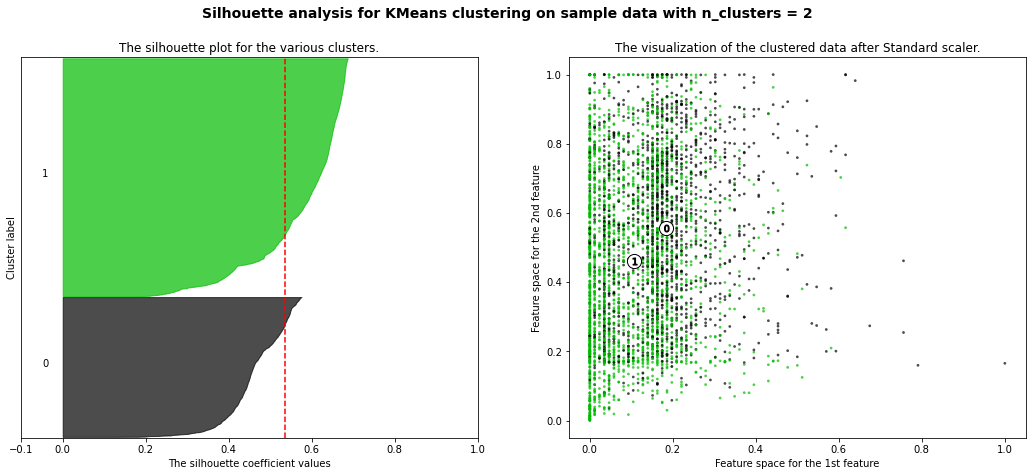

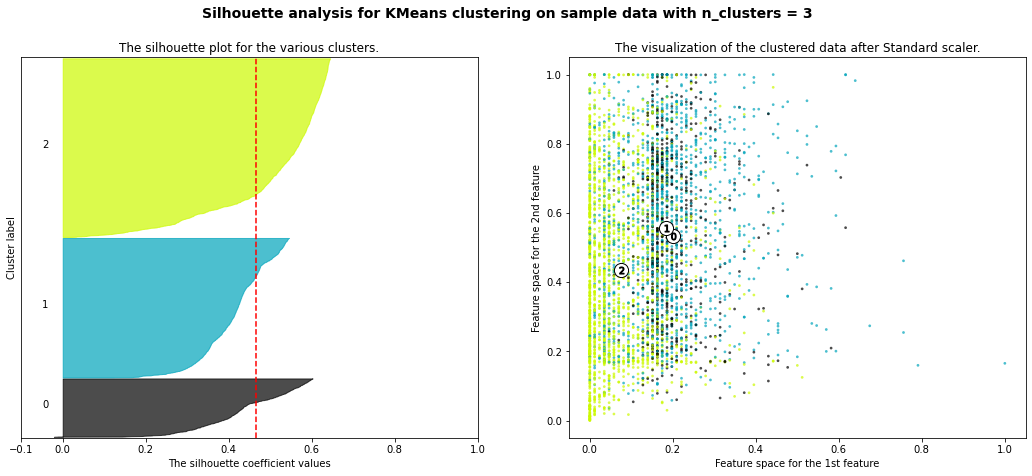

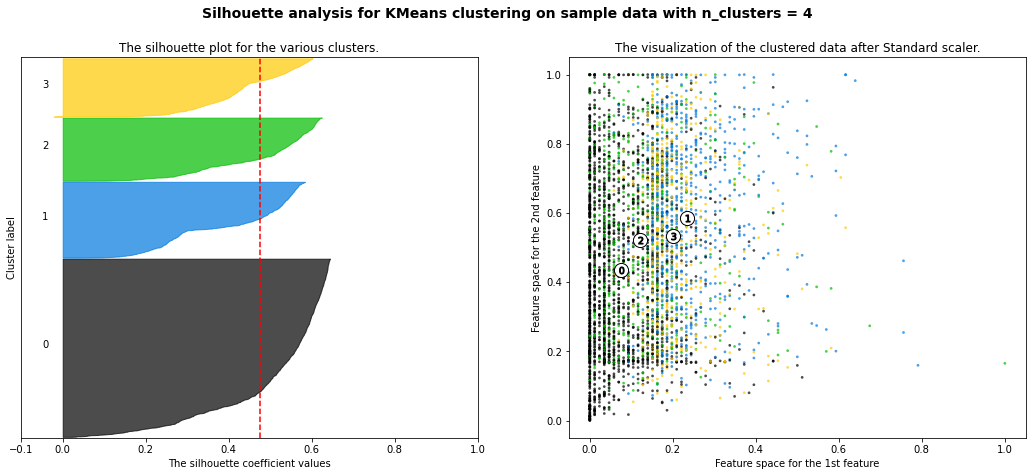

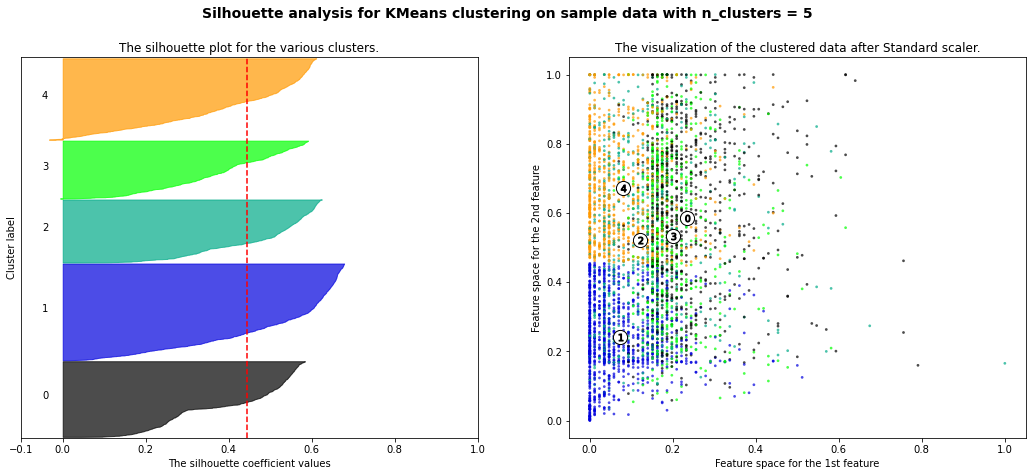

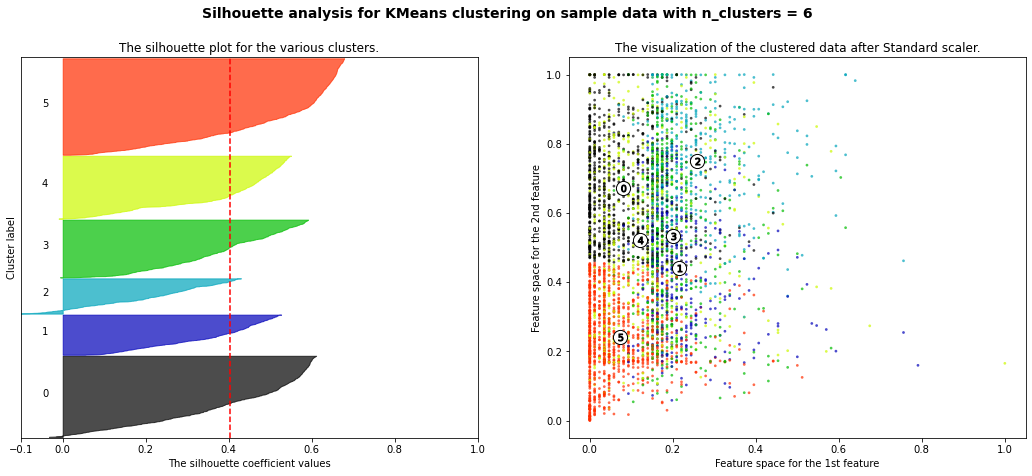

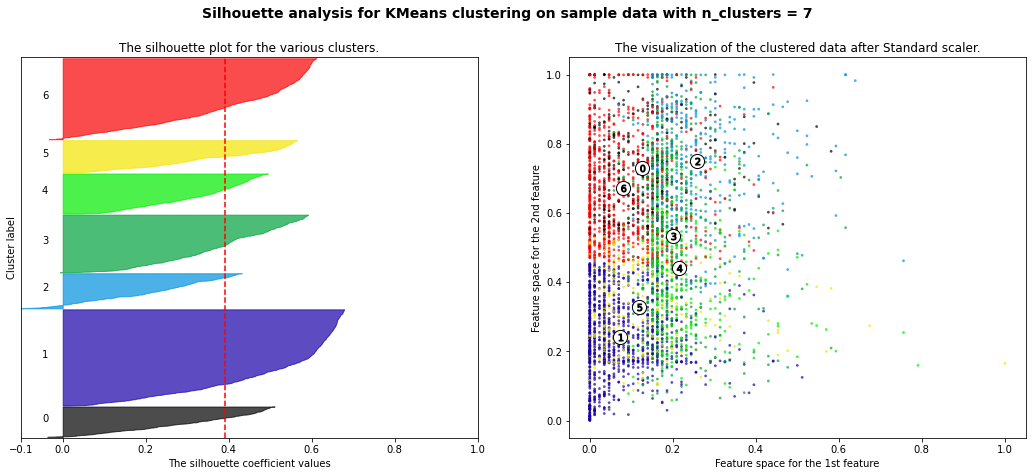

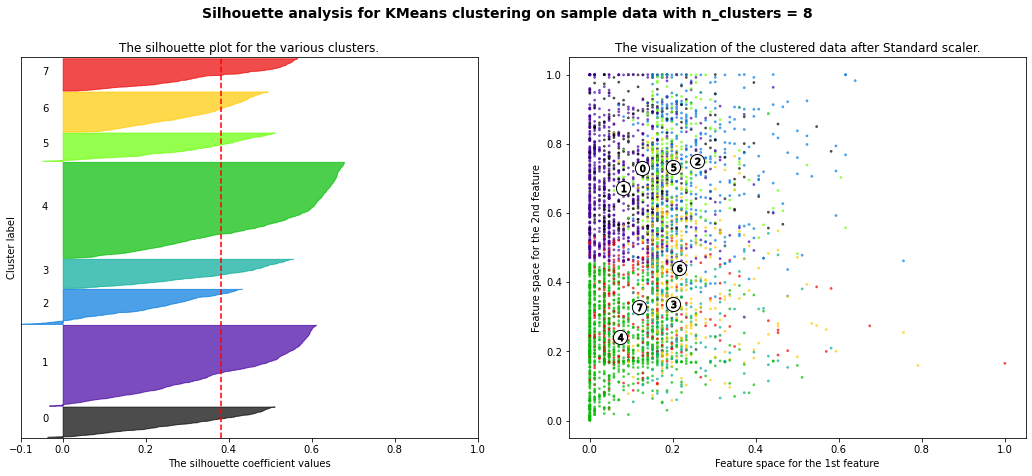

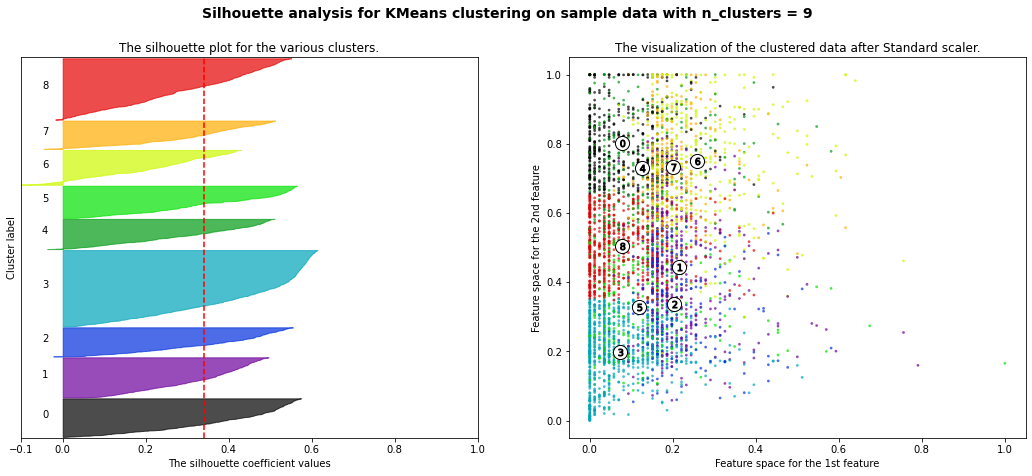

In [147]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,6], minmax_df[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [148]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3999,)

In [149]:
y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [150]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [151]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50812450e-02,  7.85813260e-03,  1.76330421e-01,
         6.94996029e-03,  2.18427323e-03,  3.87875269e-02,
         1.06313612e-01,  7.34309944e-03,  1.23113582e-02,
         4.60411394e-01, -4.99600361e-16]])

In [152]:
model_kmeans.inertia_

823.6756984125205

In [153]:
data['Kmeans_label'] = model_kmeans.labels_

In [154]:
# Group data by Clusters (K=2)
df.groupby('Kmeans_label').agg(['mean'])

Murder     Assault   UrbanPop       Rape Hierarchical_labels  \
                mean        mean       mean       mean                mean   
Kmeans_label                                                                 
0             4.870   114.433333  63.633333  15.943333  0.0                  
1             12.165  255.250000  68.400000  29.165000  1.0                  

             DBSCAN_labels  
                      mean  
Kmeans_label                
0             0.00          
1             0.05

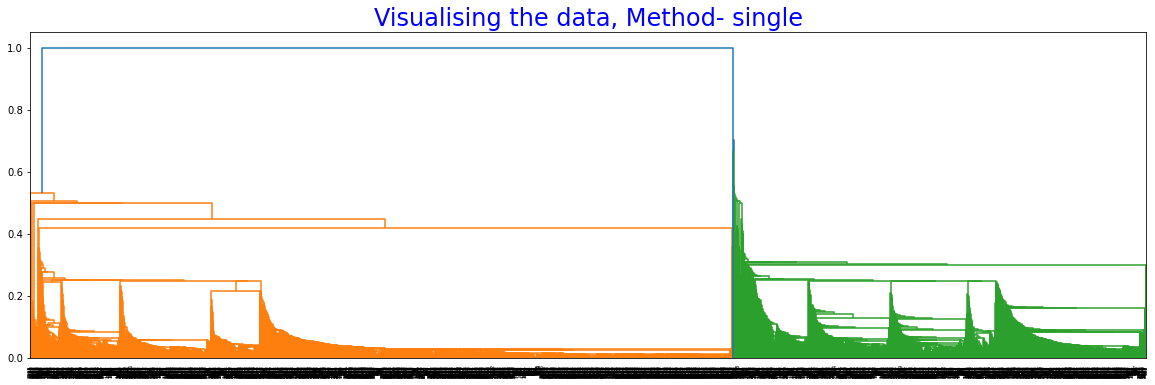

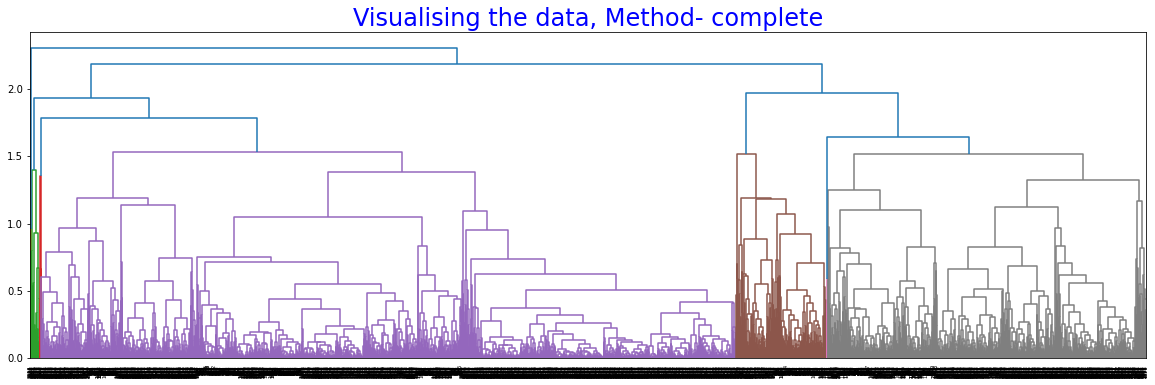

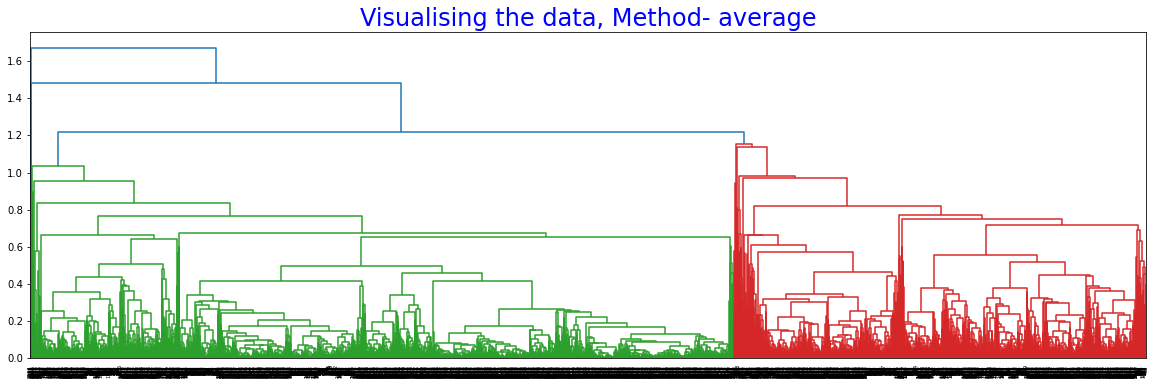

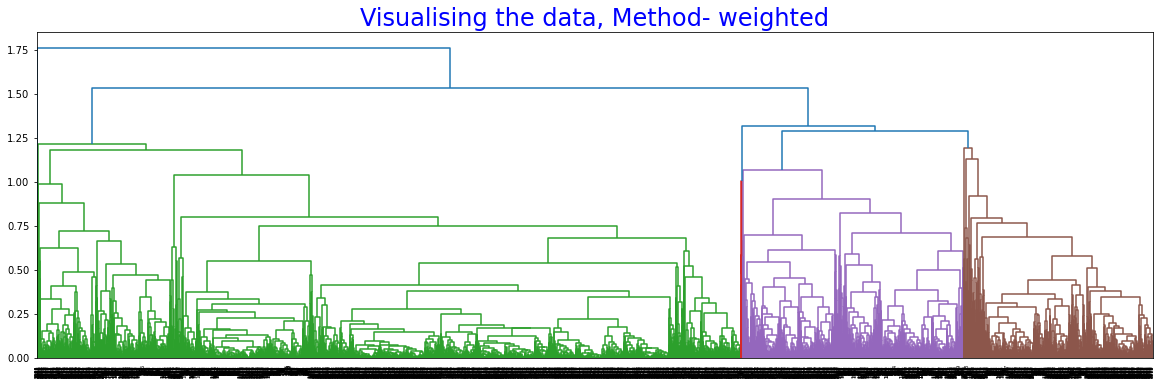

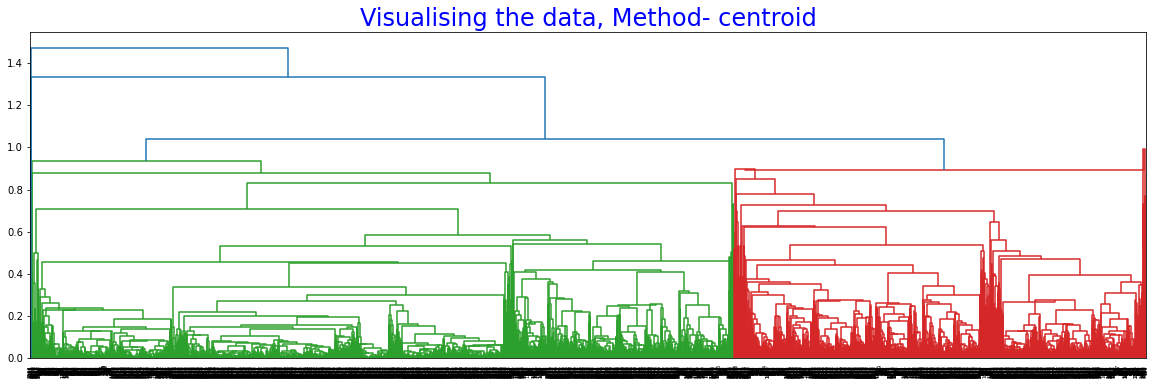

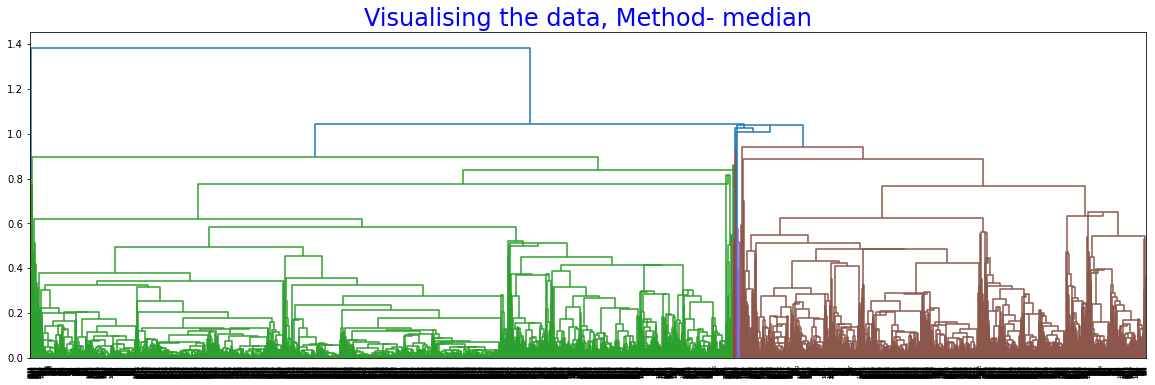

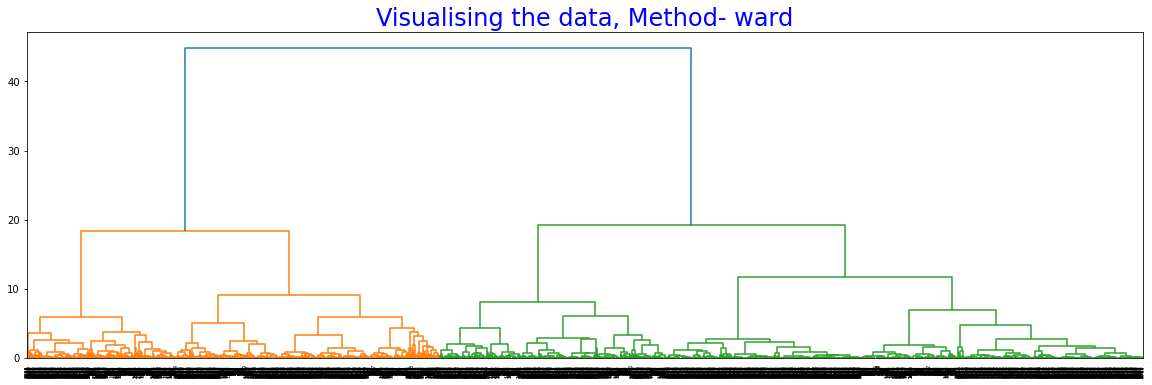

In [155]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [156]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535930510919477
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47040913679492186
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535930510919477

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.43550164891825044
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318787367232326
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39619766243707655
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351606918177734

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42494300944261365
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.46459708515197673
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5286018409871408
F

In [157]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.28926595242577247
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8111134025692677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562820070415407

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2940432062008608
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760836053602842
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838667595062349
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350532148998382

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.30814152852022786
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985727763092806
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7731120442583631
For

In [158]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [159]:
# eigenvalues..

print(pca_std.singular_values_)

[114.62320365  83.12946351  64.9433498   63.53081811  61.96651495
  60.39644071  56.79935294  49.81594442  37.95522507]


In [160]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[29.86764604 15.70962673  9.58793945  9.17539578  8.72911177  8.29236866
  7.33403008  5.64147473  3.27490761]


In [161]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.86764604, 45.57727277, 55.16521222, 64.340608  , 73.06971976,
       81.36208842, 88.69611851, 94.33759324, 97.61250085])

In [162]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.1997484819435644
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108872970217894
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108872970217894
For n_clusters = 2 The average silhouette_score with linkage- single : 0.738348693430483

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2111738156170391
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7784326687701913
For n_clusters = 3 The average silhouette_score with linkage- average : 0.785815703158887
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7380711786432603

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21512158688323976
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6685647808748
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7754755890058265
For n_clu

In [163]:
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [164]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [165]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

19.975

In [166]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  
ID                                     
1   1             1                    
2   1             1                    
3   1             1                    
4   1             1                    
5   0             0

In [167]:
data.groupby('Hierarchical_labels').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                              mean        mean      mean      mean      mean   
Hierarchical_labels                                                            
0                    101290.534671  249.525949  2.793284  1.000000  1.021369   
1                    36384.825909   2.433177    1.073271  1.033998  1.000000   

                      Bonus_miles Bonus_trans Flight_miles_12mo  \
                             mean        mean              mean   
Hierarchical_labels                                               
0                    27673.668993  15.607065   720.235063         
1                    2993.269050   6.218640    110.354045         

                    Flight_trans_12 Days_since_enroll     Award Kmeans_label  
                               mean              mean      mean         mean  
Hierarchical_labels                                                           
0                    2.112952        4581.034889       0.632359  0.367641     
1                    0.379836        3496.955451       0.018171  0.981829

In [168]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [169]:
# eigenvalues..

print(pca_minmax.singular_values_)

[32.61670755 20.38332523 14.95110164  6.55157753]


In [170]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[58.10867135 22.69398556 12.20975906  2.34451208]


In [171]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = sil(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5570574742349607
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4506642023138537
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4747033851497029
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5570574742349607

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4668442861396812
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5527446133470341
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5545574774683506
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5558068847998209

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.46056391656489376
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.509530818047692
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4979760029410702
For n

In [172]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [173]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [174]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

55.706

In [175]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  
ID                                     
1   1             0                    
2   1             0                    
3   1             0                    
4   1             0                    
5   0             1

In [176]:
df.groupby('Hierarchical_labels').agg(['mean'])

Murder     Assault   UrbanPop       Rape Kmeans_label  \
                       mean        mean       mean       mean         mean   
Hierarchical_labels                                                          
0                    4.870   114.433333  63.633333  15.943333  0.0           
1                    12.165  255.250000  68.400000  29.165000  1.0           

                    DBSCAN_labels  
                             mean  
Hierarchical_labels                
0                    0.00          
1                    0.05

In [177]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [178]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


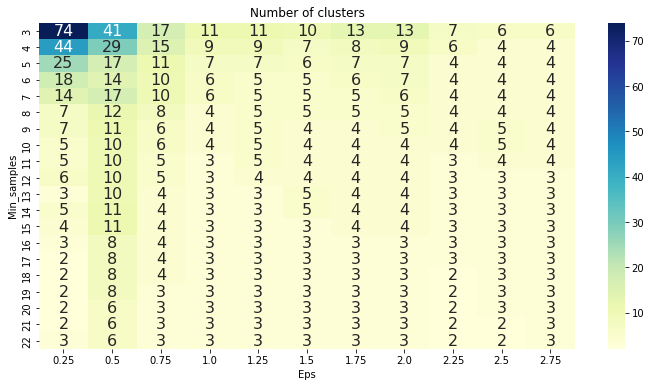

In [179]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

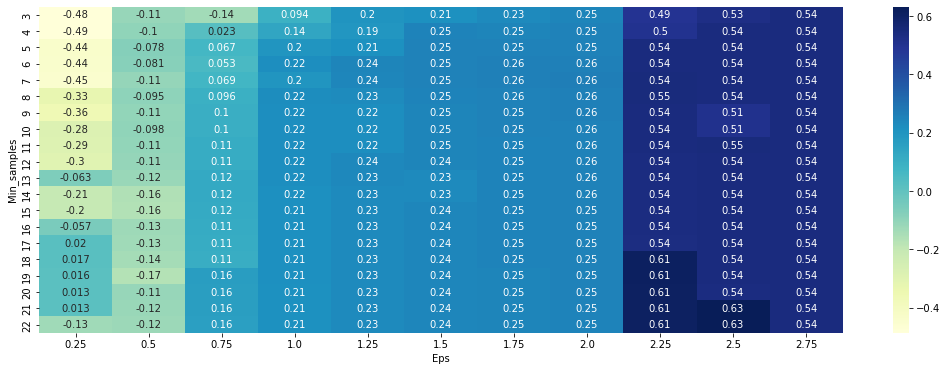

In [180]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [181]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


In [182]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [183]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [184]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  DBSCAN_labels  
ID                                                    
1   1             0                    0              
2   1             0                    0              
3   1             0                    0              
4   1             0                    0              
5   0             1                    0

In [185]:
data.groupby('DBSCAN_labels').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                        mean         mean      mean      mean      mean   
DBSCAN_labels                                                             
-1             211990.889423  1522.576923  2.509615  1.278846  1.235577   
 0             66008.336587   68.482722    2.034819  1.000000  1.000000   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
DBSCAN_labels                                                               
-1             45335.081731  24.754808   3276.389423       9.548077         
 0             15598.138486  10.880243   305.532577        0.925086         

              Days_since_enroll     Award Kmeans_label Hierarchical_labels  
                           mean      mean         mean                mean  
DBSCAN_labels                                                               
-1             4768.596154       0.687500  0.312500     0.687500            
 0             4082.893959       0.352941  0.647059     0.352941

In [186]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)


DBSCAN(eps=1, min_samples=22)

In [187]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [188]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Kmeans_label  Hierarchical_labels  DBSCAN_labels  
ID                                                    
1   1             0                    0              
2   1             0                    0              
3   1             0                    0              
4   1             0                    0              
5   0             1                    1

In [189]:
data.groupby('DBSCAN_labels').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean        mean      mean      mean      mean   
DBSCAN_labels                                                           
0              59807.839555  87.602462   1.705322  1.01390   1.008737   
1              97053.051317  240.196489  2.661715  1.01553   1.018231   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
DBSCAN_labels                                                               
0              10227.689039  9.142971    226.292295        0.652502         
1              28905.414585  15.782579   857.501013        2.599595         

              Days_since_enroll Award Kmeans_label Hierarchical_labels  
                           mean  mean         mean                mean  
DBSCAN_labels                                                           
0              3820.652105       0.0   1.0          0.0                 
1              4625.062120       1.0   0.0          1.0

In [190]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data.loc[data.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data.loc[data.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [191]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
Balance              59807.839555  97053.051317
Qual_miles           87.602462     240.196489  
cc1_miles            1.705322      2.661715    
cc2_miles            1.013900      1.015530    
cc3_miles            1.008737      1.018231    
Bonus_miles          10227.689039  28905.414585
Bonus_trans          9.142971      15.782579   
Flight_miles_12mo    226.292295    857.501013  
Flight_trans_12      0.652502      2.599595    
Days_since_enroll    3820.652105   4625.062120 
Award                0.000000      1.000000    
Kmeans_label         1.000000      0.000000    
Hierarchical_labels  0.000000      1.000000    
DBSCAN_labels        0.000000      1.000000

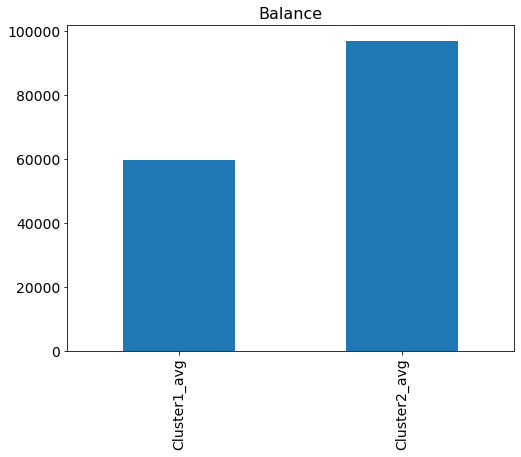

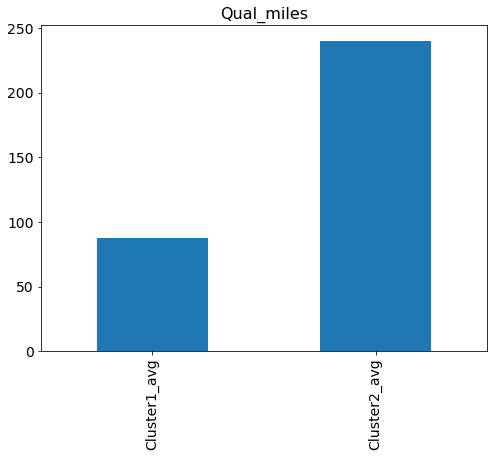

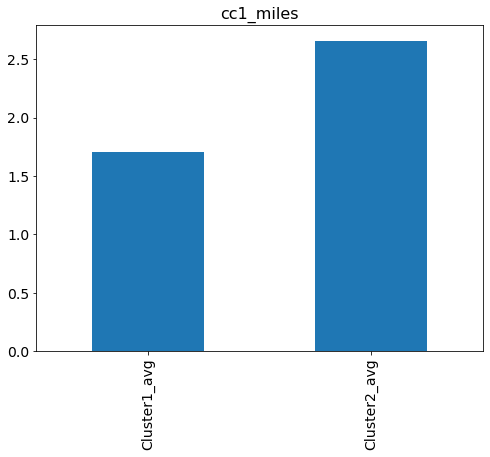

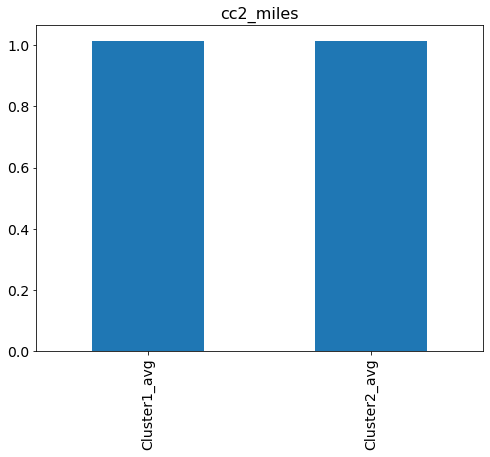

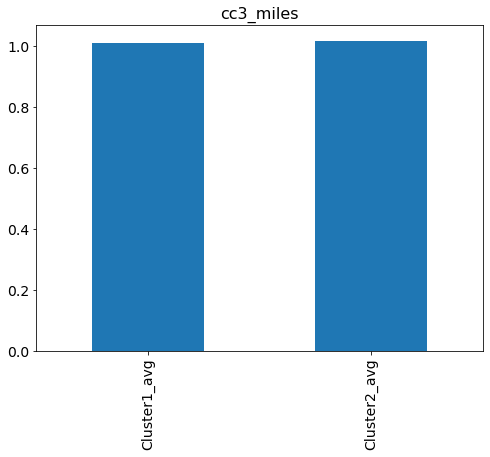

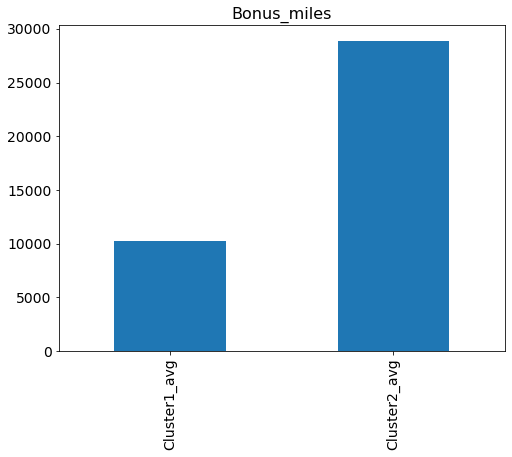

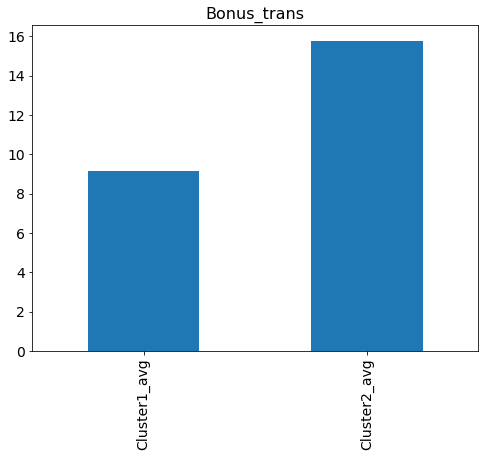

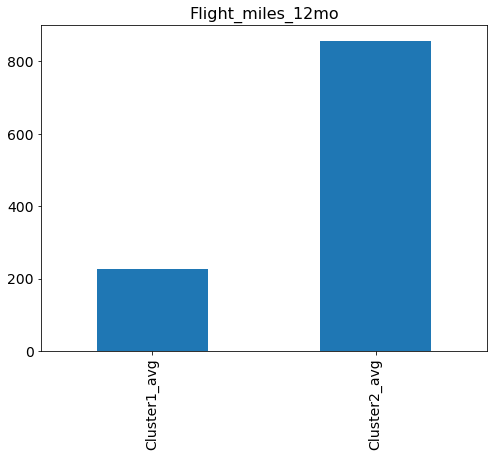

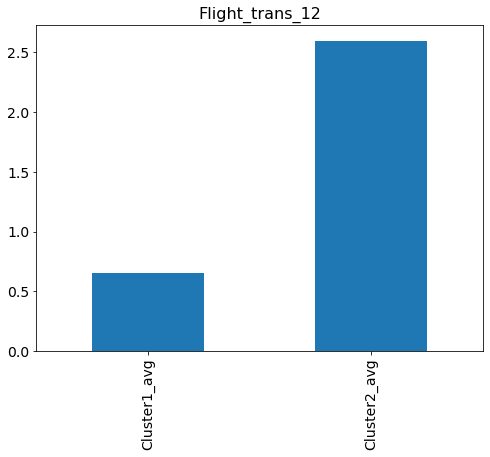

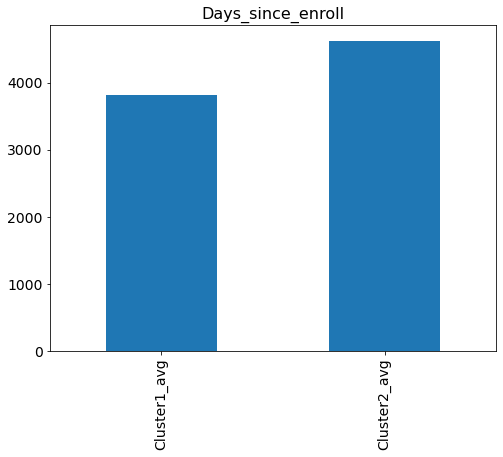

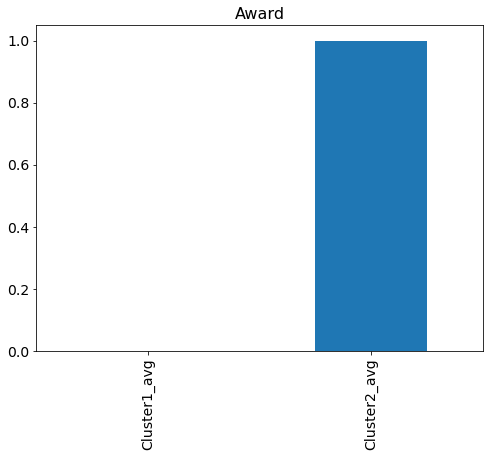

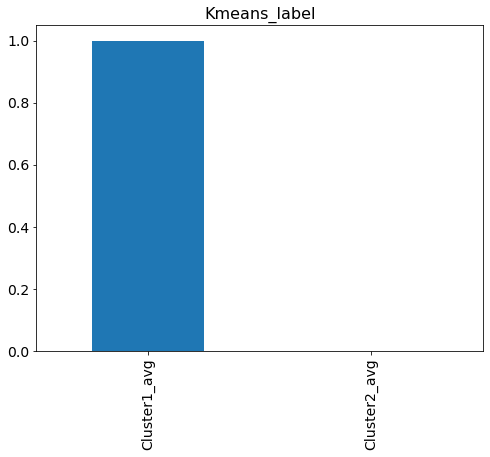

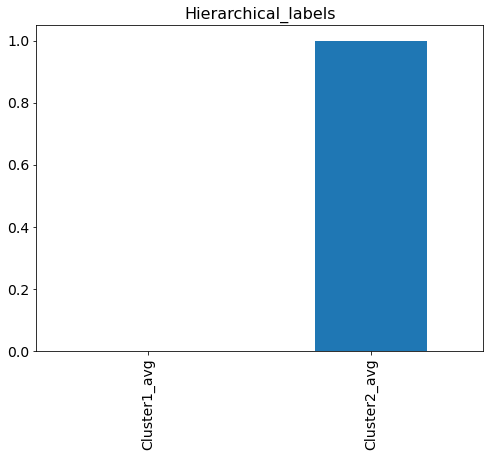

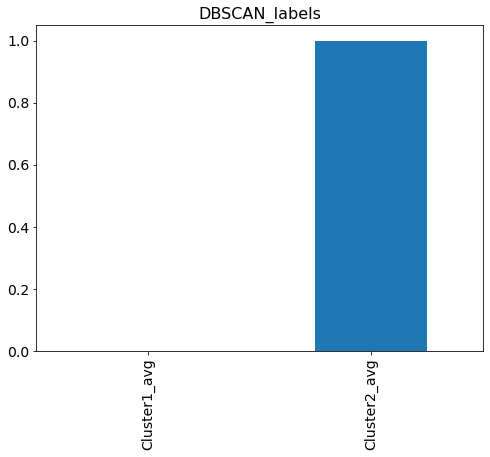

In [192]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()